# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Zainal Fattah
- Email: project.zf01@gmail.com
- Id Dicoding: mosaicnim

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy  as np
import re
import math
from scipy.stats import chi2_contingency
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# untuk evaluasi model
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score

### Menyiapkan data yang akan digunakan

In [70]:
df = pd.read_csv('data.csv')

In [3]:
df

,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...
...,...
4419,1;1;6;9773;1;1;125.0;1;1;1;5;4;122.2;0;0;0;1;1...
4420,1;1;2;9773;1;1;120.0;105;1;1;9;9;119.0;1;0;1;0...
4421,1;1;1;9500;1;1;154.0;1;37;37;9;9;149.5;1;0;0;1...
4422,1;1;1;9147;1;1;180.0;1;37;37;7;4;153.8;1;0;0;1...


Pada dataset tersebut terdapat delimiter berupa tanda ";", maka untuk menangani masalah tersebut tambahkan parameter bawaan pandas yaitu "sep="

In [4]:
df = pd.read_csv('data.csv', sep=";")

In [5]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [6]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Pada dataset terdapat 37 column dan 4424 row, berikut penjelasan lebih lanjut tentang datasetnya:

1. Marital status =
Status pernikahan mahasiswa. (Kategorikal)
1 – single
2 – married
3 – widower
4 – divorced
5 – facto union
6 – legally separated

2. Application mode =
Metode pendaftaran yang digunakan oleh mahasiswa. (Kategorikal)
1 – 1st phase - general contingent
2 – Ordinance No. 612/93
5 – 1st phase - special contingent (Azores Island)
7 – Holders of other higher courses
10 – Ordinance No. 854-B/99
15 – International student (bachelor)
16 – 1st phase - special contingent (Madeira Island)
17 – 2nd phase - general contingent
18 – 3rd phase - general contingent
26 – Ordinance No. 533-A/99, item b2) (Different Plan)
27 – Ordinance No. 533-A/99, item b3 (Other Institution)
39 – Over 23 years old
42 – Transfer
43 – Change of course
44 – Technological specialization diploma holders
51 – Change of institution/course
53 – Short cycle diploma holders
57 – Change of institution/course (International)

3. Application order =
Urutan pilihan saat mahasiswa mendaftar (Numerik, antara 0 – pilihan pertama; hingga 9 – pilihan terakhir)

4. Course =
Program studi yang diambil mahasiswa. (Kategorikal)
33 – Biofuel Production Technologies
171 – Animation and Multimedia Design
8014 – Social Service (evening attendance)
9003 – Agronomy
9070 – Communication Design
9085 – Veterinary Nursing
9119 – Informatics Engineering
9130 – Equinculture
9147 – Management
9238 – Social Service
9254 – Tourism
9500 – Nursing
9556 – Oral Hygiene
9670 – Advertising and Marketing Management
9773 – Journalism and Communication
9853 – Basic Education
9991 – Management (evening attendance)

5. Daytime/evening attendance =
Apakah mahasiswa mengikuti kelas pada siang atau malam hari. (Kategorikal)
0 – evening
1 – daytime

6. Previous qualification =
Kualifikasi yang dimiliki mahasiswa sebelum mendaftar ke pendidikan tinggi. (Kategorikal)
1 – Secondary education
2 – Higher education - bachelor's degree
3 – Higher education - degree
4 – Higher education - master's
5 – Higher education - doctorate
6 – Frequency of higher education
9 – 12th year of schooling - not completed
10 – 11th year of schooling - not completed
12 – Other - 11th year of schooling
14 – 10th year of schooling
15 – 10th year of schooling - not completed
19 – Basic education 3rd cycle (9th/10th/11th year) or equivalent
38 – Basic education 2nd cycle (6th/7th/8th year) or equivalent
39 – Technological specialization course
40 – Higher education - degree (1st cycle)
42 – Professional higher technical course
43 – Higher education - master (2nd cycle)

7. Previous qualification (grade) =
Nilai dari kualifikasi sebelumnya (antara 0 dan 200)

8. Nacionality =
Kewarganegaraan mahasiswa. (Kategorikal)
1 – Portuguese
2 – German
6 – Spanish
11 – Italian
13 – Dutch
14 – English
17 – Lithuanian
21 – Angolan
22 – Cape Verdean
24 – Guinean
25 – Mozambican
26 – Santomean
32 – Turkish
41 – Brazilian
62 – Romanian
100 – Moldova (Republic of)
101 – Mexican
103 – Ukrainian
105 – Russian
108 – Cuban
109 – Colombian

9. Mother's qualification =
Kualifikasi pendidikan ibu mahasiswa. (Kategorikal)
1 – Secondary Education - 12th Year of Schooling or Equivalent
2 – Higher Education - Bachelor's Degree
3 – Higher Education - Degree
4 – Higher Education - Master's
5 – Higher Education - Doctorate
6 – Frequency of Higher Education
9 – 12th Year of Schooling - Not Completed
10 – 11th Year of Schooling - Not Completed
11 – 7th Year (Old)
12 – Other - 11th Year of Schooling
14 – 10th Year of Schooling
18 – General commerce course
19 – Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent
22 – Technical-professional course
26 – 7th year of schooling
27 – 2nd cycle of the general high school course
29 – 9th Year of Schooling - Not Completed
30 – 8th year of schooling
34 – Unknown
35 – Can't read or write
36 – Can read without having a 4th year of schooling
37 – Basic education 1st cycle (4th/5th year) or equivalent
38 – Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent
39 – Technological specialization course
40 – Higher education - degree (1st cycle)
41 – Specialized higher studies course
42 – Professional higher technical course
43 – Higher Education - Master (2nd cycle)
44 – Higher Education - Doctorate (3rd cycle)

10. Father's qualification =
Kualifikasi pendidikan ayah mahasiswa. (Kategorikal)
1 – Secondary Education - 12th Year of Schooling or Equivalent
2 – Higher Education - Bachelor's Degree
3 – Higher Education - Degree
4 – Higher Education - Master's
5 – Higher Education - Doctorate
6 – Frequency of Higher Education
9 – 12th Year of Schooling - Not Completed
10 – 11th Year of Schooling - Not Completed
11 – 7th Year (Old)
12 – Other - 11th Year of Schooling
13 – 2nd year complementary high school course
14 – 10th Year of Schooling
18 – General commerce course
19 – Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent
20 – Complementary High School Course
22 – Technical-professional course
25 – Complementary High School Course - not concluded
26 – 7th year of schooling
27 – 2nd cycle of the general high school course
29 – 9th Year of Schooling - Not Completed
30 – 8th year of schooling
31 – General Course of Administration and Commerce
33 – Supplementary Accounting and Administration
34 – Unknown
35 – Can't read or write
36 – Can read without having a 4th year of schooling
37 – Basic education 1st cycle (4th/5th year) or equivalent
38 – Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent
39 – Technological specialization course
40 – Higher education - degree (1st cycle)
41 – Specialized higher studies course
42 – Professional higher technical course
43 – Higher Education - Master (2nd cycle)
44 – Higher Education - Doctorate (3rd cycle)

11. Mother's occupation =
Pekerjaan ibu mahasiswa. (Kategorikal)
0 – Student
1 – Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
2 – Specialists in Intellectual and Scientific Activities
3 – Intermediate Level Technicians and Professions
4 – Administrative staff
5 – Personal Services, Security and Safety Workers and Sellers
6 – Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
7 – Skilled Workers in Industry, Construction and Craftsmen
8 – Installation and Machine Operators and Assembly Workers
9 – Unskilled Workers
10 – Armed Forces Professions
90 – Other Situation
99 – (blank)
122 – Health professionals
123 – teachers
125 – Specialists in information and communication technologies (ICT)
131 – Intermediate level science and engineering technicians and professions
132 – Technicians and professionals, of intermediate level of health
134 – Intermediate level technicians from legal, social, sports, cultural and similar services
141 – Office workers, secretaries in general and data processing operators
143 – Data, accounting, statistical, financial services and registry-related operators
144 – Other administrative support staff
151 – personal service workers
152 – sellers
153 – Personal care workers and the like
171 – Skilled construction workers and the like, except electricians
173 – Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like
175 – Workers in food processing, woodworking, clothing and other industries and crafts
191 – cleaning workers
192 – Unskilled workers in agriculture, animal production, fisheries and forestry
193 – Unskilled workers in extractive industry, construction, manufacturing and transport
194 – Meal preparation assistants

12. Father's occupation =
Pekerjaan ayah mahasiswa. (Kategorikal)
0 – Student
1 – Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
2 – Specialists in Intellectual and Scientific Activities
3 – Intermediate Level Technicians and Professions
4 – Administrative staff
5 – Personal Services, Security and Safety Workers and Sellers
6 – Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
7 – Skilled Workers in Industry, Construction and Craftsmen
8 – Installation and Machine Operators and Assembly Workers
9 – Unskilled Workers
10 – Armed Forces Professions
90 – Other Situation
99 – (blank)
101 – Armed Forces Officers
102 – Armed Forces Sergeants
103 – Other Armed Forces personnel
112 – Directors of administrative and commercial services
114 – Hotel, catering, trade and other services directors
121 – Specialists in the physical sciences, mathematics, engineering and related techniques
122 – Health professionals
123 – teachers
124 – Specialists in finance, accounting, administrative organization, public and commercial relations
131 – Intermediate level science and engineering technicians and professions
132 – Technicians and professionals, of intermediate level of health
134 – Intermediate level technicians from legal, social, sports, cultural and similar services
135 – Information and communication technology technicians
141 – Office workers, secretaries in general and data processing operators
143 – Data, accounting, statistical, financial services and registry-related operators
144 – Other administrative support staff
151 – personal service workers
152 – sellers
153 – Personal care workers and the like
154 – Protection and security services personnel
161 – Market-oriented farmers and skilled agricultural and animal production workers
163 – Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
171 – Skilled construction workers and the like, except electricians
172 – Skilled workers in metallurgy, metalworking and similar
174 – Skilled workers in electricity and electronics
175 – Workers in food processing, woodworking, clothing and other industries and crafts
181 – Fixed plant and machine operators
182 – assembly workers
183 – Vehicle drivers and mobile equipment operators
192 – Unskilled workers in agriculture, animal production, fisheries and forestry
193 – Unskilled workers in extractive industry, construction, manufacturing and transport
194 – Meal preparation assistants
195 – Street vendors (except food) and street service providers

13. Admission grade =
Nilai penerimaan mahasiswa (antara 0 dan 200)

14. Displaced =
Apakah mahasiswa termasuk mahasiswa perantau. (Kategorikal)
0 – tidak
1 – ya

15. Educational special needs =
Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Kategorikal)
0 – tidak
1 – ya

16. Debtor =
Apakah mahasiswa memiliki tunggakan. (Kategorikal)
0 – tidak
1 – ya

17. Tuition fees up to date =
Apakah mahasiswa membayar uang kuliah tepat waktu. (Kategorikal)
0 – tidak
1 – ya

18. Gender =
Jenis kelamin mahasiswa. (Kategorikal)
0 – female
1 – male

19. Scholarship holder =
Apakah mahasiswa penerima beasiswa. (Kategorikal)
0 – tidak
1 – ya

20. Age at enrollment =
Usia mahasiswa saat mendaftar. (Numerik)

21. International =
Apakah mahasiswa berasal dari luar negeri. (Kategorikal)
0 – tidak
1 – ya

22. Curricular units 1st sem (credited) =
Jumlah mata kuliah yang diakui di semester pertama. (Numerik)

23. Curricular units 1st sem (enrolled) =
Jumlah mata kuliah yang diambil mahasiswa pada semester pertama. (Numerik)

24. Curricular units 1st sem (evaluations) =
Jumlah mata kuliah yang diikuti evaluasinya pada semester pertama. (Numerik)

25. Curricular units 1st sem (approved) =
Jumlah mata kuliah yang dinyatakan lulus pada semester pertama. (Numerik)

26. Curricular units 1st sem (grade) =
Rata-rata nilai mata kuliah pada semester pertama (antara 0 dan 20). (Numerik)

27. Curricular units 1st sem (without evaluations) =
Jumlah mata kuliah yang tidak diikuti evaluasinya pada semester pertama. (Numerik)

28. Curricular units 2nd sem (credited) =
Jumlah mata kuliah yang diakui/ditransfer (credited) pada semester kedua. (Numerik)

29. Curricular units 2nd sem (enrolled) =
Jumlah mata kuliah yang diambil (enrolled) pada semester kedua. (Numerik)

30. Curricular units 2nd sem (evaluations) =
Jumlah evaluasi yang diikuti mahasiswa pada semester kedua. (Numerik)

31. Curricular units 2nd sem (approved) =
Jumlah mata kuliah yang lulus pada semester kedua. (Numerik)

32. Curricular units 2nd sem (grade) =
Rata-rata nilai mata kuliah pada semester kedua (antara 0 dan 20). (Numerik)

33. Curricular units 2nd sem (without evaluations) =
Jumlah mata kuliah yang tidak diikuti evaluasinya pada semester kedua. (Numerik)

34.  Unemployment rate =
Tingkat pengangguran nasional (%) pada saat tahun masuk mahasiswa. (Kontinu)

35. Inflation rate =
Tingkat inflasi nasional (%) pada saat tahun masuk mahasiswa. (Kontinu)

36. GDP =
Produk Domestik Bruto nasional pada saat tahun masuk mahasiswa. (Kontinu)

37. Target =
Label target yang menunjukkan status akhir mahasiswa pada akhir masa studi normal. (Kategorikal):
    * Dropout – Mahasiswa keluar dari studi (putus kuliah)
    * Enrolled – Masih terdaftar (belum lulus)
    * Graduate – Telah lulus dari program studi

Memperbaiki nama kolom supaya untuk mempermudahkan proses lebih lanjut.

In [8]:
# Nama kolom sebelumnya
original_columns = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance\t', 'Previous qualification',
    'Previous qualification (grade)', 'Nacionality',
    "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Admission grade',
    'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'Age at enrollment', 'International',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
    'Inflation rate', 'GDP', 'Target'
]

# Fungsi pembersih nama kolom
def clean_column(name):
    # Lowercase
    name = name.lower()
    # Ganti tab dan spasi dengan underscore
    name = re.sub(r'[\t\s]+', '_', name)
    # Hapus karakter selain alfanumerik dan underscore
    name = re.sub(r'[^\w]', '', name)
    # Hindari underscore ganda
    name = re.sub(r'_+', '_', name)
    # Hapus leading/trailing underscore
    name = name.strip('_')
    return name

# Terapkan pada semua kolom
cleaned_columns = [clean_column(col) for col in original_columns]

# Cetak hasil
for old, new in zip(original_columns, cleaned_columns):
    print(f"'{old}' -> '{new}'")

'Marital status' -> 'marital_status'
'Application mode' -> 'application_mode'
'Application order' -> 'application_order'
'Course' -> 'course'
'Daytime/evening attendance	' -> 'daytimeevening_attendance'
'Previous qualification' -> 'previous_qualification'
'Previous qualification (grade)' -> 'previous_qualification_grade'
'Nacionality' -> 'nacionality'
'Mother's qualification' -> 'mothers_qualification'
'Father's qualification' -> 'fathers_qualification'
'Mother's occupation' -> 'mothers_occupation'
'Father's occupation' -> 'fathers_occupation'
'Admission grade' -> 'admission_grade'
'Displaced' -> 'displaced'
'Educational special needs' -> 'educational_special_needs'
'Debtor' -> 'debtor'
'Tuition fees up to date' -> 'tuition_fees_up_to_date'
'Gender' -> 'gender'
'Scholarship holder' -> 'scholarship_holder'
'Age at enrollment' -> 'age_at_enrollment'
'International' -> 'international'
'Curricular units 1st sem (credited)' -> 'curricular_units_1st_sem_credited'
'Curricular units 1st sem (e

In [9]:
# penerapan pada dataframe
df.columns = cleaned_columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                4424 non-null   int64  
 1   application_mode                              4424 non-null   int64  
 2   application_order                             4424 non-null   int64  
 3   course                                        4424 non-null   int64  
 4   daytimeevening_attendance                     4424 non-null   int64  
 5   previous_qualification                        4424 non-null   int64  
 6   previous_qualification_grade                  4424 non-null   float64
 7   nacionality                                   4424 non-null   int64  
 8   mothers_qualification                         4424 non-null   int64  
 9   fathers_qualification                         4424 non-null   i

In [11]:
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytimeevening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nacionality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_with

mengubah tipe data float ke integer

In [12]:
float_cols = df.select_dtypes(include='float64').columns
for col in float_cols:
    if (df[col] % 1 == 0).all():
        df[col] = df[col].astype(int)
        print(f"Kolom '{col}' telah dikonversi dari float ke int.")
    else:
        print(f"Kolom '{col}' tidak dikonversi karena memiliki nilai desimal.")


Kolom 'previous_qualification_grade' tidak dikonversi karena memiliki nilai desimal.
Kolom 'admission_grade' tidak dikonversi karena memiliki nilai desimal.
Kolom 'curricular_units_1st_sem_grade' tidak dikonversi karena memiliki nilai desimal.
Kolom 'curricular_units_2nd_sem_grade' tidak dikonversi karena memiliki nilai desimal.
Kolom 'unemployment_rate' tidak dikonversi karena memiliki nilai desimal.
Kolom 'inflation_rate' tidak dikonversi karena memiliki nilai desimal.
Kolom 'gdp' tidak dikonversi karena memiliki nilai desimal.


dikarenakan kolom kategorikal isi datanya masih numerik, kita ubah terlebih dahulu supaya memudahkan analisa lebih lanjut.

In [13]:
# Mapping untuk setiap kolom kategorikal
# Mapping untuk setiap kolom kategorikal (key disesuaikan dengan nama kolom dataframe)
mappings = {
    'marital_status': {
        1: 'single',
        2: 'married',
        3: 'widower',
        4: 'divorced',
        5: 'facto union',
        6: 'legally separated'
    },
    'application_mode': {
        1: '1st phase - general contingent',
        2: 'Ordinance No. 612/93',
        5: '1st phase - special contingent (Azores Island)',
        7: 'Holders of other higher courses',
        10: 'Ordinance No. 854-B/99',
        15: 'International student (bachelor)',
        16: '1st phase - special contingent (Madeira Island)',
        17: '2nd phase - general contingent',
        18: '3rd phase - general contingent',
        26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
        27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
        39: 'Over 23 years old',
        42: 'Transfer',
        43: 'Change of course',
        44: 'Technological specialization diploma holders',
        51: 'Change of institution/course',
        53: 'Short cycle diploma holders',
        57: 'Change of institution/course (International)'
    },
    'course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    'daytimeevening_attendance': {
        0: 'evening',
        1: 'daytime'
    },
    'previous_qualification': {
        1: 'Secondary education',
        2: 'Higher education - bachelor\'s degree',
        3: 'Higher education - degree',
        4: 'Higher education - master\'s',
        5: 'Higher education - doctorate',
        6: 'Frequency of higher education',
        9: '12th year of schooling - not completed',
        10: '11th year of schooling - not completed',
        12: 'Other - 11th year of schooling',
        14: '10th year of schooling',
        15: '10th year of schooling - not completed',
        19: 'Basic education 3rd cycle (9th/10th/11th year) or equivalent',
        38: 'Basic education 2nd cycle (6th/7th/8th year) or equivalent',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        42: 'Professional higher technical course',
        43: 'Higher education - master (2nd cycle)'
    },
    'nacionality': {
        1: 'Portuguese',
        2: 'German',
        6: 'Spanish',
        11: 'Italian',
        13: 'Dutch',
        14: 'English',
        17: 'Lithuanian',
        21: 'Angolan',
        22: 'Cape Verdean',
        24: 'Guinean',
        25: 'Mozambican',
        26: 'Santomean',
        32: 'Turkish',
        41: 'Brazilian',
        62: 'Romanian',
        100: 'Moldova (Republic of)',
        101: 'Mexican',
        103: 'Ukrainian',
        105: 'Russian',
        108: 'Cuban',
        109: 'Colombian'
    },
    'mothers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Equivalent',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
        22: 'Technical-professional course',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equivalent',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'        
    },
    'fathers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Equivalent',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd year complementary high school course',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
        20: 'Complementary High School Course',
        22: 'Technical-professional course',
        25: 'Complementary High School Course - not concluded',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equivalent',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'        
    },
    'mothers_occupation': {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        122: 'Health professionals',
        123: 'teachers',
        125: 'Specialists in information and communication technologies (ICT)',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Technicians and professionals, of intermediate level of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'personal service workers',
        152: 'sellers',
        153: 'Personal care workers and the like',
        171: 'Skilled construction workers and the like, except electricians',
        173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        191: 'cleaning workers',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants'        
    },
    'fathers_occupation': {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces personnel',
        112: 'Directors of administrative and commercial services',
        114: 'Hotel, catering, trade and other services directors',
        121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
        122: 'Health professionals',
        123: 'teachers',
        124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Technicians and professionals, of intermediate level of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        135: 'Information and communication technology technicians',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'personal service workers',
        152: 'sellers',
        153: 'Personal care workers and the like',
        154: 'Protection and security services personnel',
        161: 'Market-oriented farmers and skilled agricultural and animal production workers',
        163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
        171: 'Skilled construction workers and the like, except electricians',
        172: 'Skilled workers in metallurgy, metalworking and similar',
        174: 'Skilled workers in electricity and electronics',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        181: 'Fixed plant and machine operators',
        182: 'assembly workers',
        183: 'Vehicle drivers and mobile equipment operators',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants',
        195: 'Street vendors (except food) and street service providers'        
    },
    'displaced': {
        0: 'no',
        1: 'yes'
    },
    'educational_special_needs': {
        0: 'no',
        1: 'yes'
    },
    'debtor': {
        0: 'no',
        1: 'yes'
    },
    'tuition_fees_up_to_date': {
        0: 'no',
        1: 'yes'
    },
    'gender': {
        0: 'female',
        1: 'male'
    },
    'scholarship_holder': {
        0: 'no',
        1: 'yes'
    },
    'international': {
        0: 'no',
        1: 'yes'
    },
    'target': {
        'Dropout': 'Dropout',
        'Enrolled': 'Enrolled',
        'Graduate': 'Graduate'
    }
}


# Fungsi untuk mengubah kolom numerik menjadi kategorikal
def convert_to_category(df, column_name, mapping):
    if column_name in df.columns:
        df[column_name] = df[column_name].map(mapping).astype('object')
        print(f"Kolom {column_name} telah diubah ke tipe category")

# Mengubah semua kolom kategorikal
for column_name, mapping in mappings.items():
    convert_to_category(df, column_name, mapping)

Kolom marital_status telah diubah ke tipe category
Kolom application_mode telah diubah ke tipe category
Kolom course telah diubah ke tipe category
Kolom daytimeevening_attendance telah diubah ke tipe category
Kolom previous_qualification telah diubah ke tipe category
Kolom nacionality telah diubah ke tipe category
Kolom mothers_qualification telah diubah ke tipe category
Kolom fathers_qualification telah diubah ke tipe category
Kolom mothers_occupation telah diubah ke tipe category
Kolom fathers_occupation telah diubah ke tipe category
Kolom displaced telah diubah ke tipe category
Kolom educational_special_needs telah diubah ke tipe category
Kolom debtor telah diubah ke tipe category
Kolom tuition_fees_up_to_date telah diubah ke tipe category
Kolom gender telah diubah ke tipe category
Kolom scholarship_holder telah diubah ke tipe category
Kolom international telah diubah ke tipe category
Kolom target telah diubah ke tipe category


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                4424 non-null   object 
 1   application_mode                              4424 non-null   object 
 2   application_order                             4424 non-null   int64  
 3   course                                        4424 non-null   object 
 4   daytimeevening_attendance                     4424 non-null   object 
 5   previous_qualification                        4424 non-null   object 
 6   previous_qualification_grade                  4424 non-null   float64
 7   nacionality                                   4424 non-null   object 
 8   mothers_qualification                         4424 non-null   object 
 9   fathers_qualification                         4424 non-null   o

In [15]:
df.head()

,marital_status,application_mode,application_order,course,daytimeevening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Describe Column Numerical and Categorical

In [16]:
print("\nDescriptive Stats (Data Numerical):\n", df.describe())
print("\nDescriptive Stats (Data Categorical):\n", df.select_dtypes(include='object').describe())


Descriptive Stats (Data Numerical):
        application_order  previous_qualification_grade  admission_grade  \
count        4424.000000                   4424.000000      4424.000000   
mean            1.727848                    132.613314       126.978119   
std             1.313793                     13.188332        14.482001   
min             0.000000                     95.000000        95.000000   
25%             1.000000                    125.000000       117.900000   
50%             1.000000                    133.100000       126.100000   
75%             2.000000                    140.000000       134.800000   
max             9.000000                    190.000000       190.000000   

       age_at_enrollment  curricular_units_1st_sem_credited  \
count        4424.000000                        4424.000000   
mean           23.265145                           0.709991   
std             7.587816                           2.360507   
min            17.000000          

**Data numerik** : menunjukkan bahwa sebagian besar mahasiswa mendaftar melalui pilihan pertama dan memiliki nilai rata-rata sebelumnya serta nilai masuk sekitar 127, dengan usia rata-rata saat mendaftar adalah 23 tahun. Sebagian besar mahasiswa terdaftar dalam 5–7 mata kuliah per semester, dengan jumlah evaluasi dan unit yang disetujui mencerminkan beban akademik sedang.

**Data kategorikal** : memperlihatkan mayoritas mahasiswa berstatus lajang, mengikuti kuliah siang, berasal dari Portugal, dan paling banyak mengambil jurusan Keperawatan. Sebagian besar orang tua mereka memiliki pendidikan menengah, bekerja sebagai pekerja tidak terampil, dan mayoritas mahasiswa bukan penerima beasiswa serta tidak memiliki kebutuhan pendidikan khusus.

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

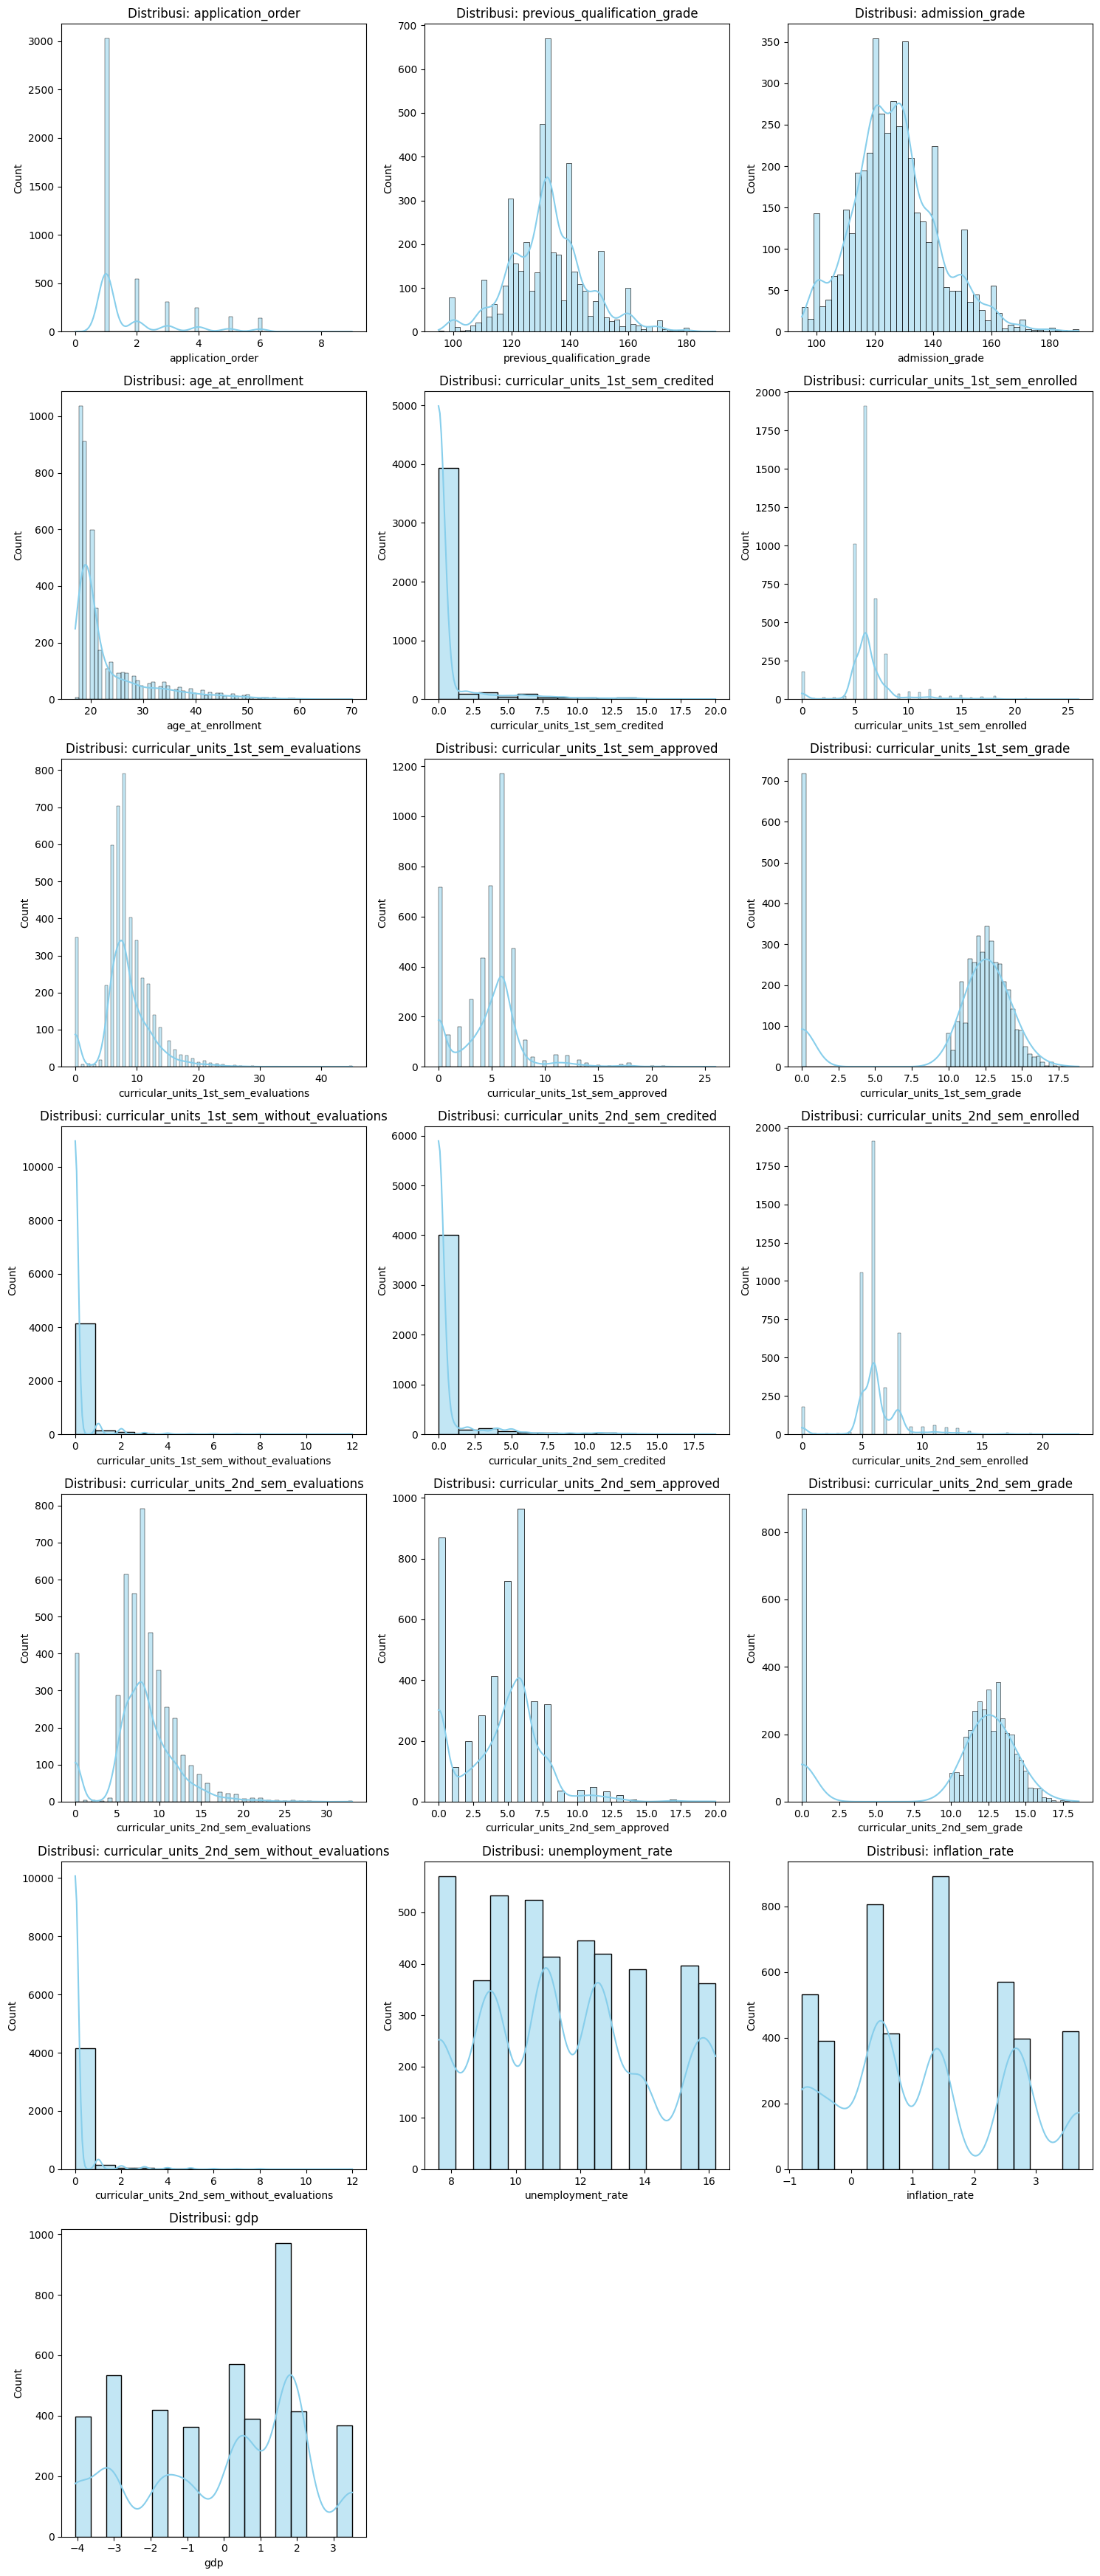

In [18]:
n = len(numerical_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribusi: {col}")

plt.tight_layout()
plt.show()

Tujuan dari visualisasi ini adalah untuk memahami karakteristik dasar dari setiap fitur numerik dalam dataset, seperti pola distribusi, kecenderungan nilai, dan potensi keberadaan outlier sebelum dilakukan analisis lebih lanjut atau pembangunan model prediktif. Visualisasi ini merupakan bagian penting dari proses Exploratory Data Analysis (EDA), khususnya pada tahap univariate analysis, di mana setiap variabel dianalisis secara terpisah. Dari grafik yang ditampilkan, kita dapat mengamati bahwa beberapa fitur seperti application_order, age_at_enrollment, dan curricular_units_1st_sem_credited menunjukkan distribusi yang sangat miring ke kanan (right-skewed), sedangkan variabel seperti previous_qualification_grade, admission_grade, dan curricular_units_2nd_sem_grade tampak mengikuti distribusi yang mendekati normal. 

In [19]:
categorical_cols

['marital_status',
 'application_mode',
 'course',
 'daytimeevening_attendance',
 'previous_qualification',
 'nacionality',
 'mothers_qualification',
 'fathers_qualification',
 'mothers_occupation',
 'fathers_occupation',
 'displaced',
 'educational_special_needs',
 'debtor',
 'tuition_fees_up_to_date',
 'gender',
 'scholarship_holder',
 'international',
 'target']

In [20]:
df[categorical_cols].head()

,marital_status,application_mode,course,daytimeevening_attendance,previous_qualification,nacionality,mothers_qualification,fathers_qualification,mothers_occupation,fathers_occupation,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,international,target
0,single,2nd phase - general contingent,Animation and Multimedia Design,daytime,Secondary education,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,yes,no,no,yes,male,no,no,Dropout
1,single,International student (bachelor),Tourism,daytime,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,yes,no,no,no,male,no,no,Graduate
2,single,1st phase - general contingent,Communication Design,daytime,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,yes,no,no,no,male,no,no,Dropout
3,single,2nd phase - general contingent,Journalism and Communication,daytime,Secondary education,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,yes,no,no,yes,female,no,no,Graduate
4,married,Over 23 years old,Social Service (evening attendance),evening,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,no,no,no,yes,female,no,no,Graduate


karena terlalu banyak kolom kategorikal dan isi datanya dari kolom kategorikal ada yang terlalu panjang datanya, maka disini memilih kolom yang sekiranya relevan.

In [21]:
important_cols = ['course','daytimeevening_attendance', 'marital_status', 'displaced', 'educational_special_needs','debtor','tuition_fees_up_to_date','gender','scholarship_holder','international','target']

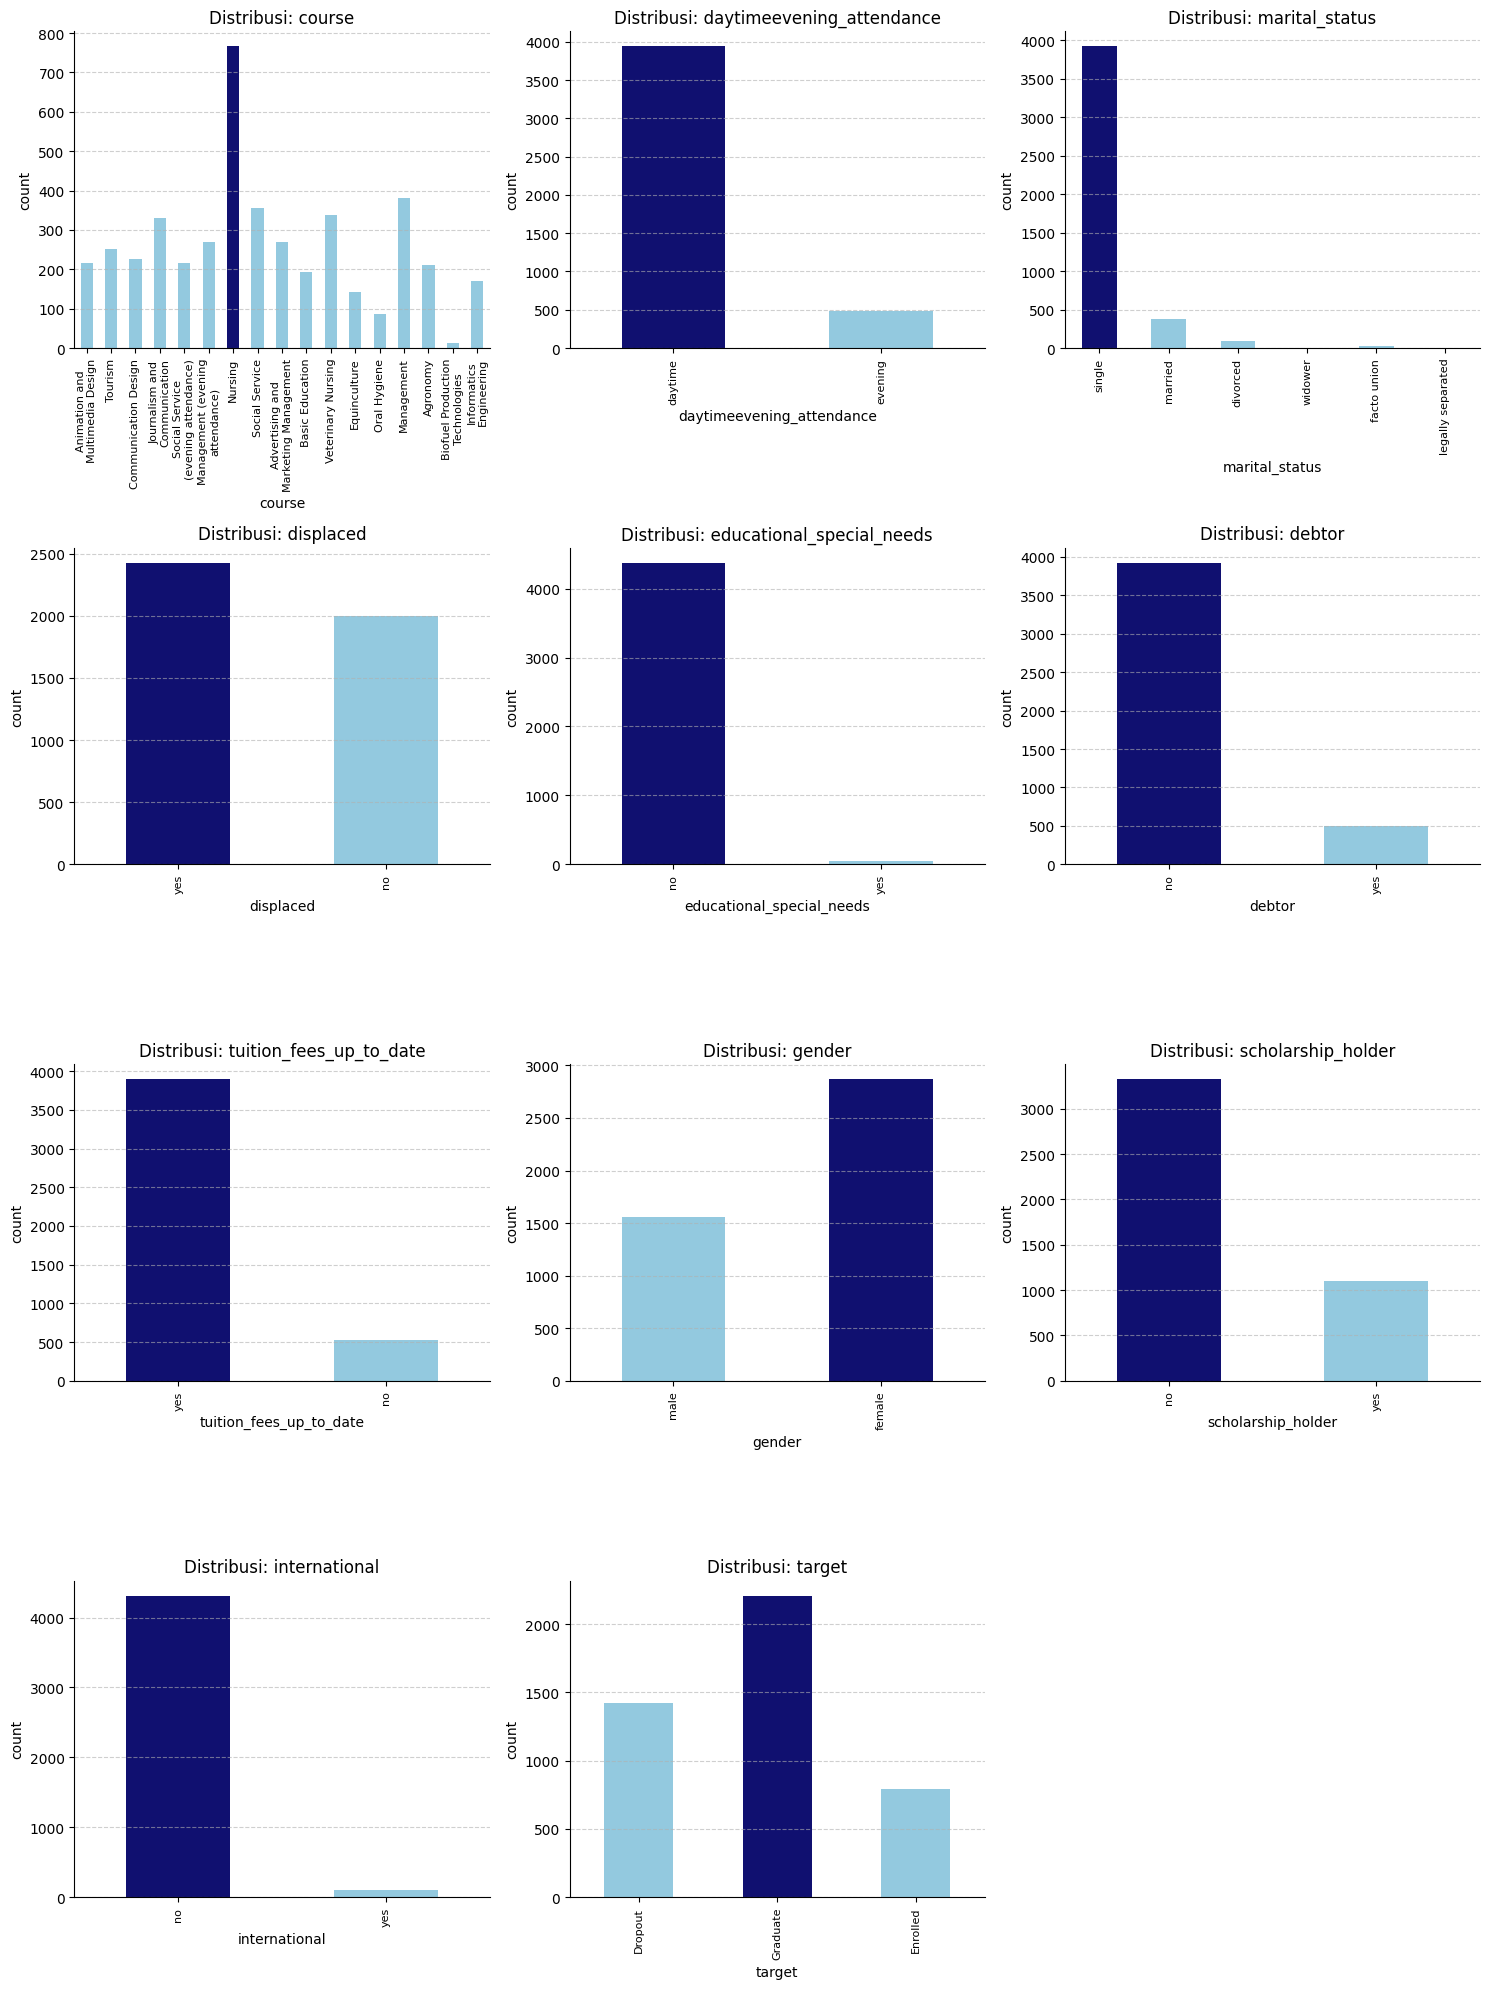

In [22]:
# Membuat visualisasi distribusi untuk kolom kategorikal menggunakan countplot
n = len(important_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(important_cols):
    plt.subplot(rows, 3, i + 1)
    
    categories = df[col].dropna().unique().tolist()
    counts = df[col].value_counts()
    max_count = counts.max()
    max_categories = counts[counts == max_count].index.tolist()
    colors = ['navy' if cat in max_categories else 'skyblue' for cat in categories]
    
    ax = sns.countplot(x=col, data=df, order=categories, hue=col, palette=colors, width=0.5, legend=False)
    plt.title(f"Distribusi: {col}")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    sns.despine()
    
    new_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_xticklabels()]
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(new_labels, rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

Dari visualisasi yang ditampilkan, terlihat bahwa sebagian besar mahasiswa berasal dari program studi Nursing, yang jumlahnya jauh lebih tinggi dibandingkan jurusan lain seperti Tourism atau Oral Hygiene, yang hanya diikuti oleh sedikit mahasiswa. Ini menunjukkan adanya ketimpangan distribusi pada fitur course. Demikian pula, pada fitur daytimeevening_attendance, mayoritas mahasiswa menghadiri perkuliahan pada waktu siang (daytime), sedangkan hanya sebagian kecil yang mengikuti kelas malam (evening), yang mungkin terkait dengan jenis pekerjaan atau status sosial ekonomi.

Distribusi marital_status menunjukkan bahwa sebagian besar mahasiswa berstatus single, dengan jumlah yang sangat sedikit berasal dari kategori lain seperti divorced atau widower, yang menunjukkan bahwa populasi mahasiswa didominasi oleh individu yang belum menikah. Pada fitur gender, terlihat bahwa mahasiswa perempuan lebih banyak dibandingkan laki-laki.

Fitur seperti debtor, educational_special_needs, dan international memiliki distribusi yang sangat timpang, di mana mayoritas mahasiswa tidak memiliki utang, tidak memiliki kebutuhan pendidikan khusus, dan bukan mahasiswa internasional. Sementara itu, fitur scholarship_holder menunjukkan bahwa sebagian besar mahasiswa tidak menerima beasiswa, yang bisa menjadi pertimbangan dalam analisis faktor-faktor penentu keberhasilan akademik.

Distribusi pada tuition_fees_up_to_date menunjukkan bahwa sebagian besar mahasiswa membayar uang kuliah tepat waktu, yang bisa berkorelasi positif terhadap keberlangsungan studi mereka. Fitur displaced juga memiliki distribusi yang cukup berimbang, meskipun kelompok yang tidak mengalami perpindahan tempat tinggal sedikit lebih dominan.

Terakhir, fitur target target menunjukkan bahwa jumlah mahasiswa yang Graduate mendominasi dibandingkan yang Dropout atau masih Enrolled. Ini adalah insight awal yang penting untuk mengetahui apakah dataset mengalami class imbalance yang harus ditangani dalam tahap preprocessing model klasifikasi nanti.

### Permasalahan Business

**Nama Institusi**: Jaya Jaya Institut

**Industri**: Pendidikan Tinggi

**Tahun Berdiri**: 2000

**Masalah Utama**: Tingginya angka student dropout (mahasiswa yang tidak menyelesaikan studi)

**Latar Belakang**:
Sebagai institusi pendidikan tinggi yang telah mencetak banyak lulusan berkualitas, Jaya Jaya Institut juga menghadapi tantangan serius: banyak mahasiswa tidak menyelesaikan pendidikannya atau dropout di tengah jalan. Hal ini berdampak pada reputasi institusi, efektivitas pengajaran, dan juga efisiensi operasional. Untuk menanggulangi hal ini, dibutuhkan solusi berbasis data yang dapat mendeteksi risiko dropout sejak dini, sehingga mahasiswa yang terindikasi dapat diberikan intervensi lebih awal melalui bimbingan, konseling, atau dukungan akademik lainnya.

In [23]:
df_new = df.copy()

#### Mengecek apakah ada outliers pada kolom numerikal

In [24]:
# Ambil hanya kolom numerik
num_cols = df_new.select_dtypes(include='number').columns

# Fungsi untuk menghitung outlier dengan IQR
def detect_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Cek semua kolom numerik
outlier_summary = []
for col in num_cols:
    outlier_count, lower, upper = detect_outliers_iqr(df_new[col])
    outlier_summary.append({
        'column': col,
        'outlier_count': outlier_count,
        'lower_bound': lower,
        'upper_bound': upper
    })

# Menampilkan hasil
outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values(by='outlier_count', ascending=False)
print(outlier_df)

                                          column  outlier_count  lower_bound  \
14                curricular_units_2nd_sem_grade            877        6.875   
8                 curricular_units_1st_sem_grade            726        7.400   
4              curricular_units_1st_sem_credited            577        0.000   
0                              application_order            541       -0.500   
10             curricular_units_2nd_sem_credited            530        0.000   
3                              age_at_enrollment            441       10.000   
5              curricular_units_1st_sem_enrolled            424        2.000   
11             curricular_units_2nd_sem_enrolled            369        2.000   
9   curricular_units_1st_sem_without_evaluations            294        0.000   
15  curricular_units_2nd_sem_without_evaluations            282        0.000   
7              curricular_units_1st_sem_approved            180       -1.500   
1                   previous_qualificati

##### Visualisasi Kolom yang memiliki outliers berdasarkan hasil yang sudah didapat

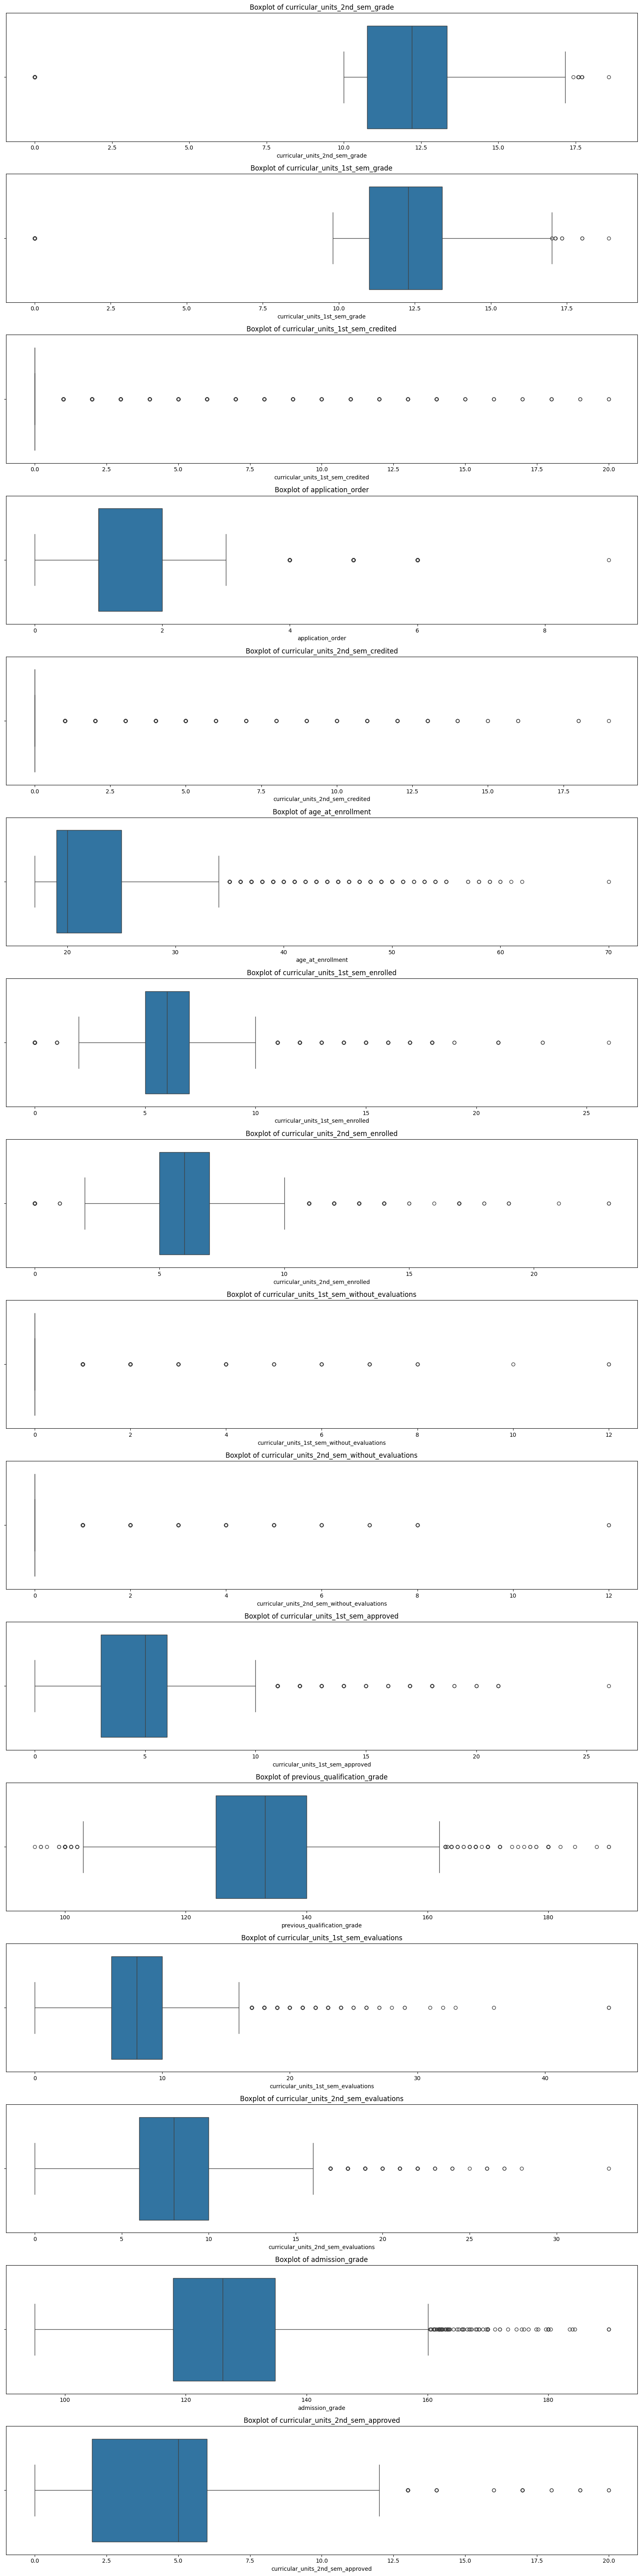

In [25]:
# Kolom yang memiliki outlier (berdasarkan hasil)
outlier_cols = [
    'curricular_units_2nd_sem_grade',
    'curricular_units_1st_sem_grade',
    'curricular_units_1st_sem_credited',
    'application_order',
    'curricular_units_2nd_sem_credited',
    'age_at_enrollment',
    'curricular_units_1st_sem_enrolled',
    'curricular_units_2nd_sem_enrolled',
    'curricular_units_1st_sem_without_evaluations',
    'curricular_units_2nd_sem_without_evaluations',
    'curricular_units_1st_sem_approved',
    'previous_qualification_grade',
    'curricular_units_1st_sem_evaluations',
    'curricular_units_2nd_sem_evaluations',
    'admission_grade',
    'curricular_units_2nd_sem_approved',
]

# Plot boxplot untuk setiap kolom
plt.figure(figsize=(16, len(outlier_cols)*4))
for i, col in enumerate(outlier_cols):
    plt.subplot(len(outlier_cols), 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

##### Mengganti Nilai Outliers dengan Median

Karena jumlah outlier tertinggi terdapat pada kolom curricular_units_2nd_sem_grade, yaitu sebanyak 877 dari total 4424 data (sekitar 19,83%), yang tergolong cukup besar, maka saya memutuskan untuk mengganti nilai outlier tersebut dengan nilai median.

In [26]:
# Salin data untuk menjaga data asli
df_replaced = df_new.copy()

# Daftar batas outlier dari hasil sebelumnya
iqr_bounds = {
    'curricular_units_2nd_sem_grade': (6.875, 17.208333),
    'curricular_units_1st_sem_grade': (7.4, 17.0),
    'curricular_units_1st_sem_credited': (0.0, 0.0),
    'application_order': (-0.5, 3.5),
    'curricular_units_2nd_sem_credited': (0.0, 0.0),
    'age_at_enrollment': (10.0, 34.0),
    'curricular_units_1st_sem_enrolled': (2.0, 10.0),
    'curricular_units_2nd_sem_enrolled': (2.0, 10.0),
    'curricular_units_1st_sem_without_evaluations': (0.0, 0.0),
    'curricular_units_2nd_sem_without_evaluations': (0.0, 0.0),
    'curricular_units_1st_sem_approved': (-1.5, 10.5),
    'previous_qualification_grade': (102.5, 162.5),
    'curricular_units_1st_sem_evaluations': (0.0, 16.0),
    'curricular_units_2nd_sem_evaluations': (0.0, 16.0),
    'admission_grade': (92.55, 160.15),
    'curricular_units_2nd_sem_approved': (-4.0, 12.0),
}

# Loop setiap kolom, ganti outlier dengan median
for col, (lower, upper) in iqr_bounds.items():
    median = df_replaced[col].median()
    df_replaced.loc[df_replaced[col] < lower, col] = median
    df_replaced.loc[df_replaced[col] > upper, col] = median

print("Outlier telah diganti dengan median.")

Outlier telah diganti dengan median.


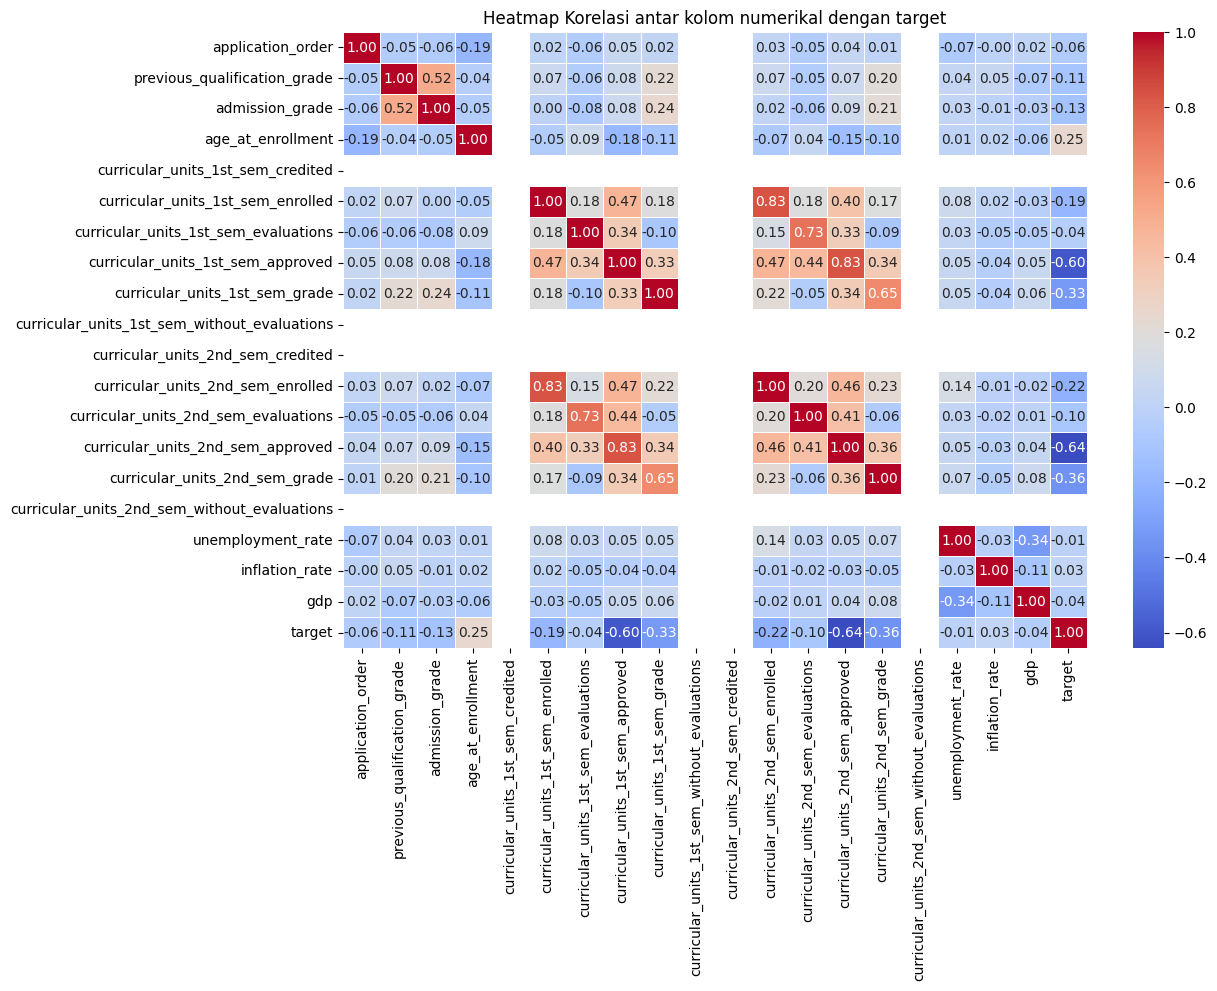

In [27]:
df_copy = df_replaced.copy()
mapp = {"Graduate":0, "Enrolled":1,"Dropout":2}
df_copy['target'] = df_copy['target'].map(mapp).astype('int')
col_cor = df_copy.select_dtypes(include='number').columns

correlation_matrix = df_copy[col_cor].corr()

# Buat heatmap
plt.figure(figsize=(12, 8))  # ukuran heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antar kolom numerikal dengan target")
plt.show()

Terlihat pada Heatmap korelasi, hanya ada dua kolom yang memiliki pengaruh dengan target lebih dari 0 % yaitu age_at_enrollment (25%) dan inflation_rate (3%)

#### Menggunakan Cramer's V untuk mengetahui tingkat Probabilitas Kolom Categorical dengan kolom target (kategorikal & kategorical)

In [28]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

untuk_visual = {}
cat_cols = categorical_cols
cat_cols.remove("target")
for i in cat_cols:
    tingkat_probabilitas = cramers_v(df_replaced[i], df_replaced['target'])
    print(f'probabilitas kolom {i} dengan Target', tingkat_probabilitas)
    untuk_visual[i] = tingkat_probabilitas * 100

probabilitas kolom marital_status dengan Target 0.07773091830778266
probabilitas kolom application_mode dengan Target 0.22114224875283905
probabilitas kolom course dengan Target 0.24393996045566074
probabilitas kolom daytimeevening_attendance dengan Target 0.07775316241933414
probabilitas kolom previous_qualification dengan Target 0.1456723418119473
probabilitas kolom nacionality dengan Target 0.025715631686744535
probabilitas kolom mothers_qualification dengan Target 0.13531689109709158
probabilitas kolom fathers_qualification dengan Target 0.13407719241056823
probabilitas kolom mothers_occupation dengan Target 0.16123243073095048
probabilitas kolom fathers_occupation dengan Target 0.14045844584419925
probabilitas kolom displaced dengan Target 0.1122738347458667
probabilitas kolom educational_special_needs dengan Target 0.0
probabilitas kolom debtor dengan Target 0.24120654431476415
probabilitas kolom tuition_fees_up_to_date dengan Target 0.43098200971571177
probabilitas kolom gender 

In [29]:
df_visual = pd.DataFrame(untuk_visual.items(), columns=['kolom_kategori','tingkat_probabilitas_ke_target'])
df_visual

,kolom_kategori,tingkat_probabilitas_ke_target
0,marital_status,7.773092
1,application_mode,22.114225
2,course,24.393996
3,daytimeevening_attendance,7.775316
4,previous_qualification,14.567234
5,nacionality,2.571563
6,mothers_qualification,13.531689
7,fathers_qualification,13.407719
8,mothers_occupation,16.123243
9,fathers_occupation,14.045845


C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\3724076787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_visual,


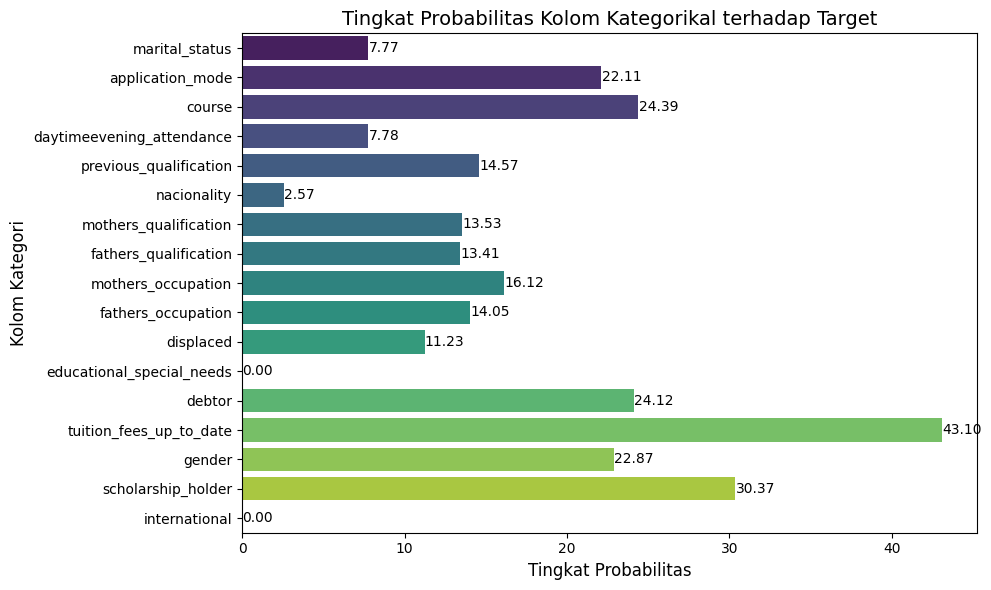

In [30]:
# Atur ukuran plot
plt.figure(figsize=(10, 6))

# Buat barplot
sns.barplot(data=df_visual, 
            x='tingkat_probabilitas_ke_target', 
            y='kolom_kategori', 
            palette='viridis')

# Tambahkan judul dan label
plt.title('Tingkat Probabilitas Kolom Kategorikal terhadap Target', fontsize=14)
plt.xlabel('Tingkat Probabilitas', fontsize=12)
plt.ylabel('Kolom Kategori', fontsize=12)

# Tampilkan nilai di ujung bar
for index, value in enumerate(df_visual['tingkat_probabilitas_ke_target']):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center')

# Tampilkan plot
plt.tight_layout()
plt.show()

Pada visual diatas terdapat 2 kolom yang tidak memiliki hubungan dengan kolom target, yaitu kolom international dan educational_special_needs yang sama-sama memiliki tingkat probabilitas 0%. Dan kolom dengan tingkat probabilitas tertinggi dengan kolom target adalah tuiton_fees_up_to_date dengan tingkat probabilitas 43.1% diikuti oleh kolom scholarship pada pertingkat ke dua yaitu 30.37%.

#### Data Visualization

##### Distribusi Kolom target

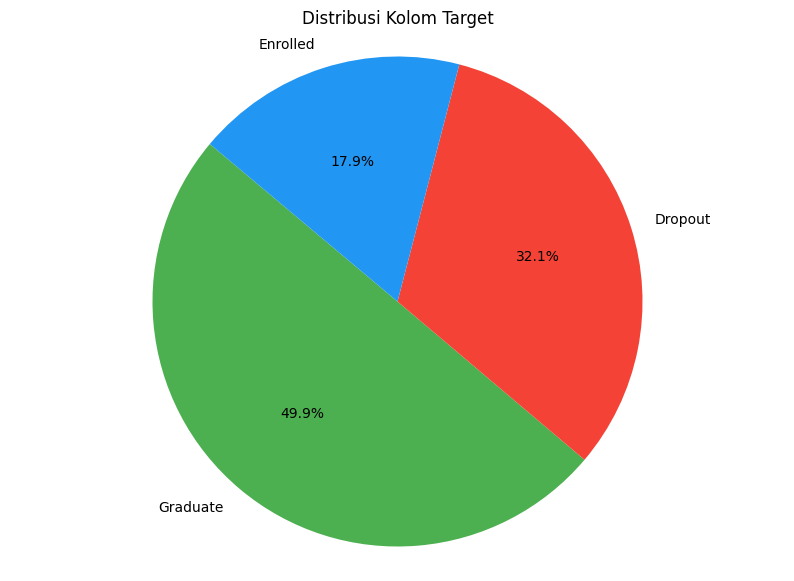

In [31]:
status_cnt = df_replaced['target'].value_counts()

status_colors = {
    'Graduate': '#4CAF50',
    'Enrolled': '#2196F3',
    'Dropout': '#F44336'
}

colors = [status_colors.get(status, '#CCCCCC') for status in status_cnt.index]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(status_cnt, labels=status_cnt.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Distribusi Kolom Target')
plt.axis('equal')
plt.show()

Pada pie chart diatas terlihat jumlah Graduate sebanyak 49.9 %, Enrolled 17.9 %,  dan Dropout 32.1 % yang sangat tinggi.

##### Hubungan Jenis Kelamin dengan Target

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\1279019843.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_replaced, palette=colors)


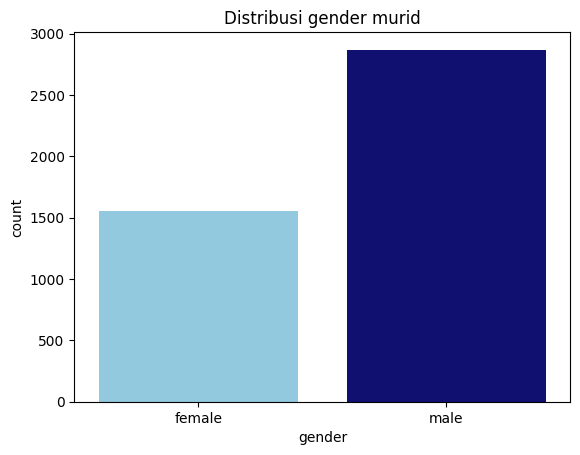

In [32]:
# Visualisasi distribusi gender
categories = df_replaced['gender'].dropna().unique().tolist()
counts = df['gender'].value_counts()
max_count = counts.max()
max_categories = counts[counts == max_count].index.tolist()
colors = ['navy' if cat in max_categories else 'skyblue' for cat in categories]
sns.countplot(x='gender', data=df_replaced, palette=colors)
plt.title('Distribusi gender murid')
plt.xticks(ticks=[0, 1], labels=['female', 'male'])
plt.show()

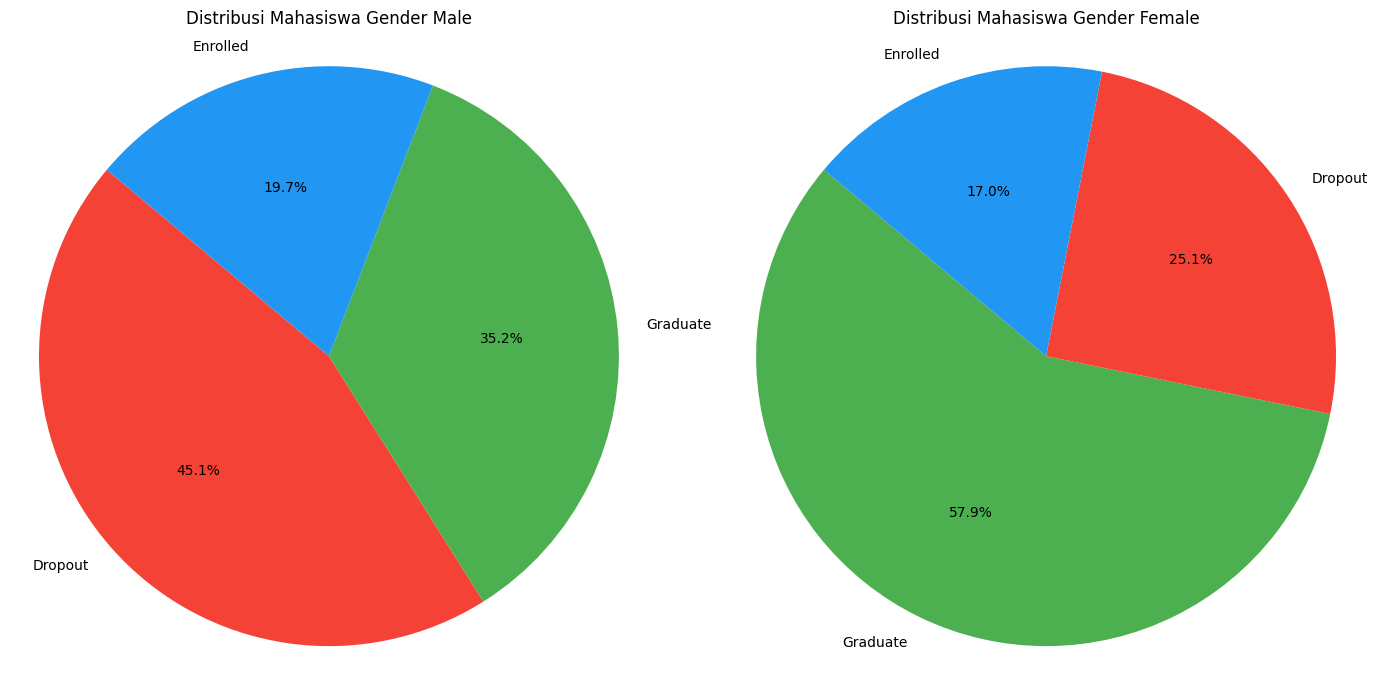

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

status_colors = {
    'Graduate': '#4CAF50',
    'Enrolled': '#2196F3',
    'Dropout': '#F44336'
}

for i, gender in enumerate(["male", "female"]):
    status_cnt = df_replaced[df_replaced['gender'] == gender]['target'].value_counts()
    
    colors = [status_colors.get(status, '#CCCCCC') for status in status_cnt.index]
    
    axes[i].pie(
        status_cnt,
        labels=status_cnt.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors
    )
    axes[i].set_title(f"Distribusi Mahasiswa Gender {gender.title()}")
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

Pada ke dua pie chart tersebut terlihat penyumbang dropout terbanyak dengan gender Laki-laki (male) sebanyak 45.1 %, dan graduate terbanyak bergender Perempuan (female) yaitu 57.9 %.

In [34]:
df_replaced.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytimeevening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nacionality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_with

##### Hubungan Marital Status dengan kolom target

In [35]:
df_replaced['marital_status'].unique()

array(['single', 'married', 'divorced', 'widower', 'facto union',
       'legally separated'], dtype=object)

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\2664954167.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='marital_status', data=df_replaced, palette=colors)


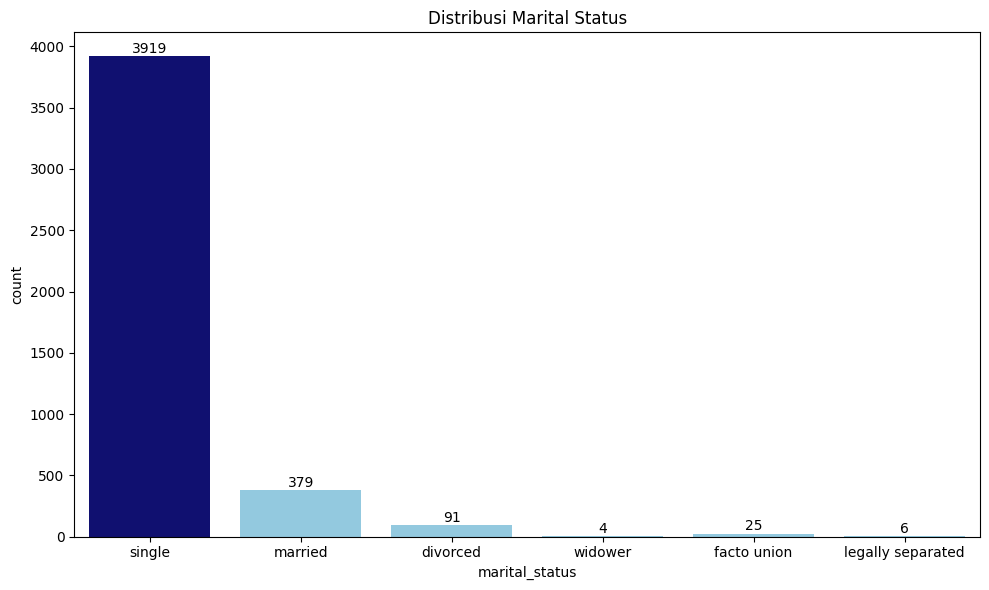

In [36]:
#color pallate
categories = df_replaced['marital_status'].dropna().unique().tolist()
counts = df['marital_status'].value_counts()
max_count = counts.max()
max_categories = counts[counts == max_count].index.tolist()
colors = ['navy' if cat in max_categories else 'skyblue' for cat in categories]

# Buat countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='marital_status', data=df_replaced, palette=colors)

# Tambahkan judul dan label sumbu x
plt.title('Distribusi Marital Status')
plt.xticks(
    ticks=[i for i in range(len(df_replaced['marital_status'].unique()))]
)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

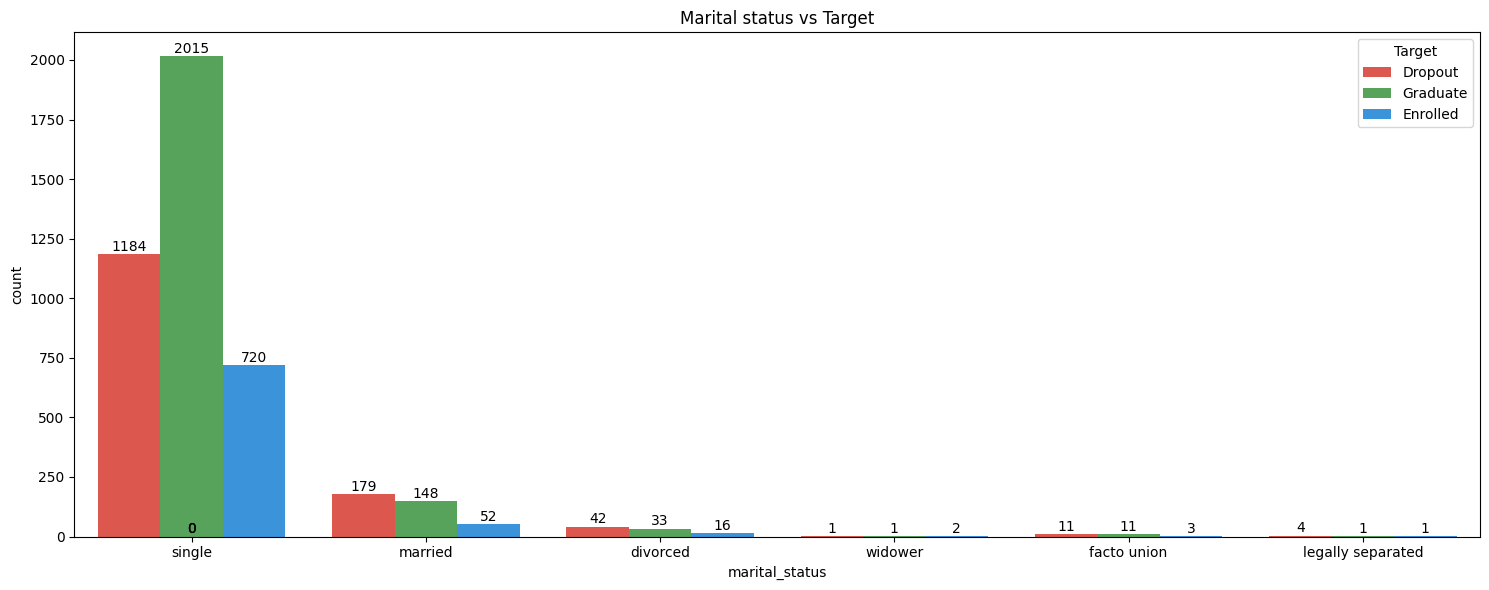

In [37]:
status_colors = {
    'Graduate': '#4CAF50',
    'Enrolled': '#2196F3',
    'Dropout': '#F44336'
}

# Visualisasi Target vs Marital_status
plt.figure(figsize=(15,6))
ax = sns.countplot(x='marital_status', hue='target', data=df_replaced, palette=status_colors)
plt.title('Marital status vs Target')
plt.xticks(rotation=0)
plt.legend(title='Target')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=10
    )
plt.tight_layout()
plt.show()

Pada visual yang disajikan marital status yaitu **single** yang paling mendominasi dari marital status lainnya, dari jumlah mahasiswa yang dropout, enrolled, maupun graduate.

##### Hubungan tuition_fees_up_to_date dengan target

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\3241148291.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='tuition_fees_up_to_date', data=df_replaced, palette=colors)


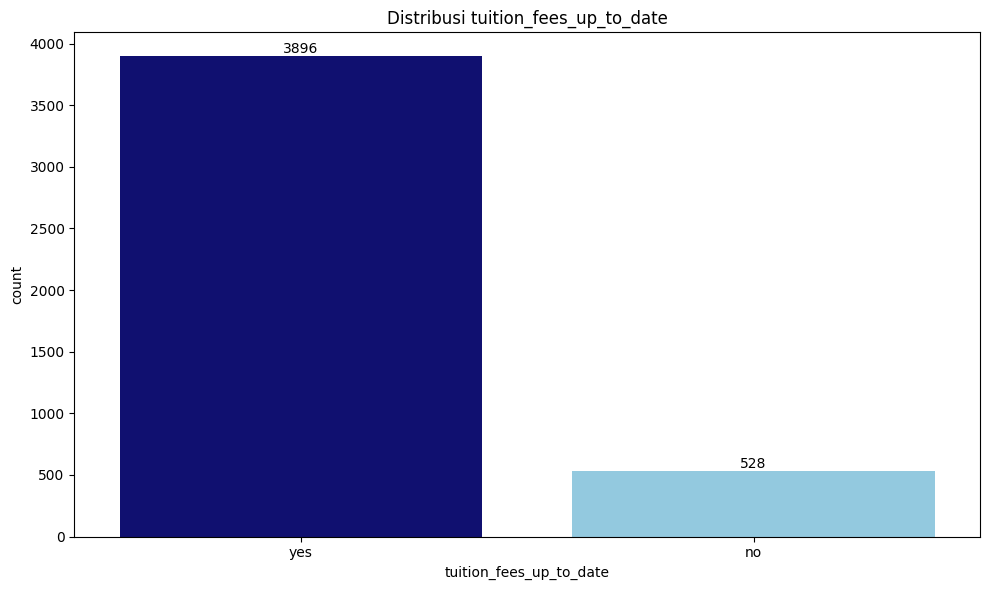

In [38]:
#color pallate
categories = df_replaced['tuition_fees_up_to_date'].dropna().unique().tolist()
counts = df['tuition_fees_up_to_date'].value_counts()
max_count = counts.max()
max_categories = counts[counts == max_count].index.tolist()
colors = ['navy' if cat in max_categories else 'skyblue' for cat in categories]

# Buat countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='tuition_fees_up_to_date', data=df_replaced, palette=colors)

# Tambahkan judul dan label sumbu x
plt.title('Distribusi tuition_fees_up_to_date')
plt.xticks(
    ticks=[i for i in range(len(df_replaced['tuition_fees_up_to_date'].unique()))]
)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

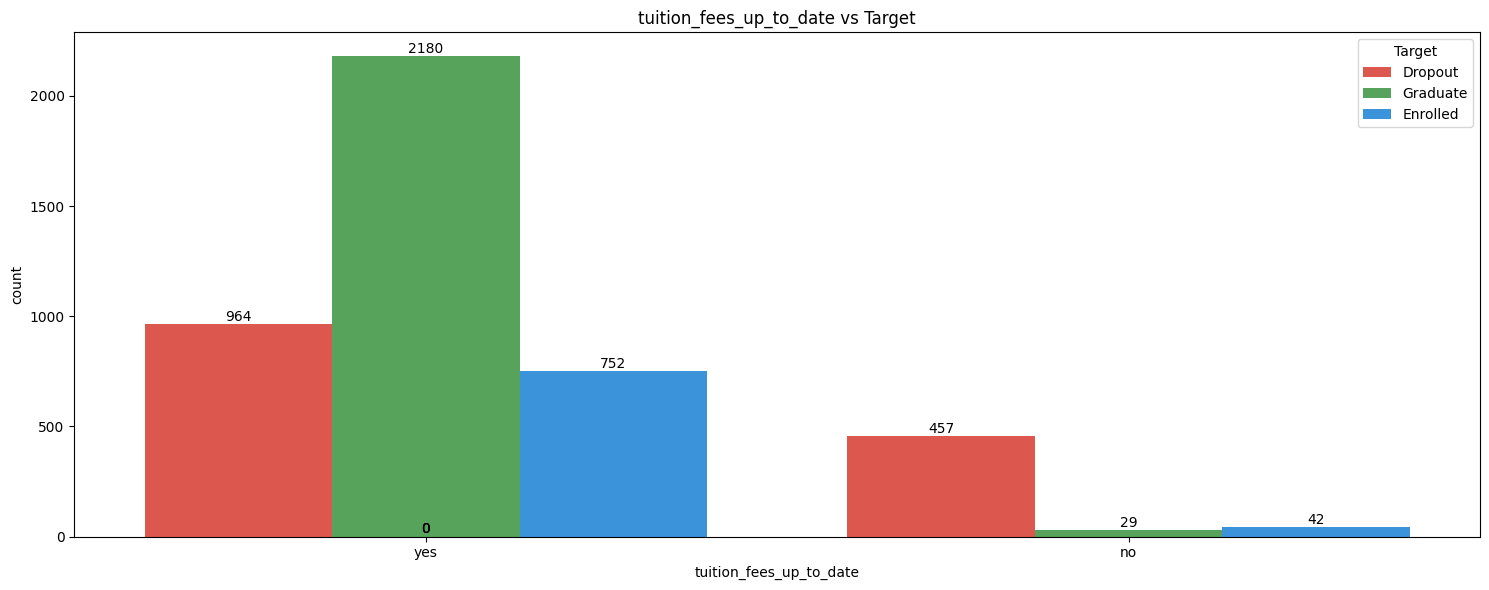

In [39]:
status_colors = {
    'Graduate': '#4CAF50',
    'Enrolled': '#2196F3',
    'Dropout': '#F44336'
}

# Visualisasi Target vs Marital_status
plt.figure(figsize=(15,6))
ax = sns.countplot(x='tuition_fees_up_to_date', hue='target', data=df_replaced, palette=status_colors)
plt.title('tuition_fees_up_to_date vs Target')
plt.xticks(rotation=0)
plt.legend(title='Target')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=10
    )
plt.tight_layout()
plt.show()

Pada visual yang disajikan hubungan kolom tuiton_fees_up_to_date dengan target, pada kategori **no** (mahasiswa yang telat membayar) lebih banyak di dominasi oleh mahasiswa yang melakukan dropout dan memiliki ketimpangan yang sangat tinggi dari jumlah mahasiswa yang graduate dan enrolled. Sementara, pada kategori **yes** mahasiswa cenderung lebih banyak yang graduate.

##### Hubungan scholarship_holder dengan Target

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\18042778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='scholarship_holder', data=df_replaced, palette=colors)


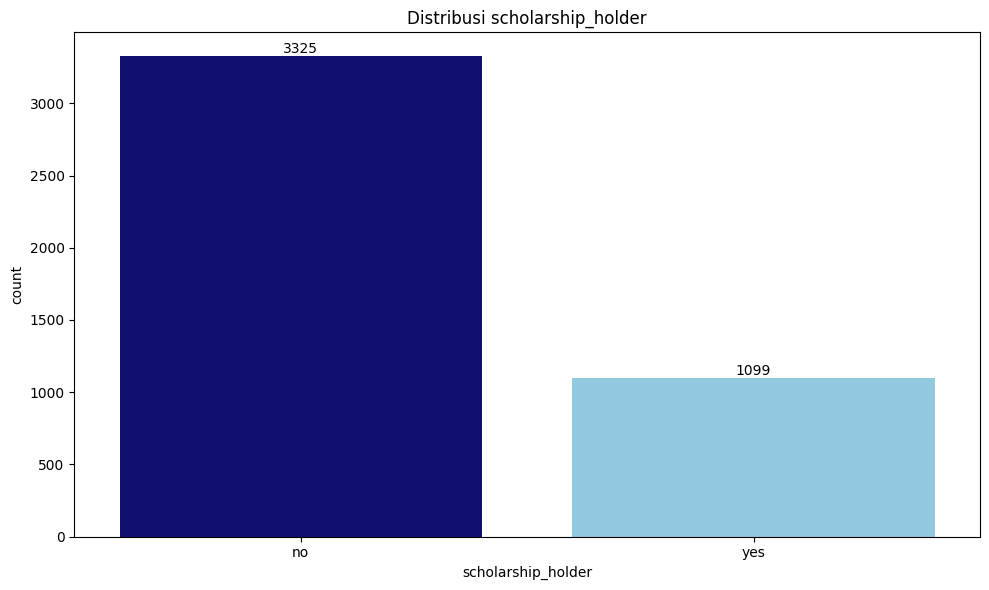

In [40]:
#color pallate
categories = df_replaced['scholarship_holder'].dropna().unique().tolist()
counts = df['scholarship_holder'].value_counts()
max_count = counts.max()
max_categories = counts[counts == max_count].index.tolist()
colors = ['navy' if cat in max_categories else 'skyblue' for cat in categories]

# Buat countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='scholarship_holder', data=df_replaced, palette=colors)

# Tambahkan judul dan label sumbu x
plt.title('Distribusi scholarship_holder')
plt.xticks(
    ticks=[i for i in range(len(df_replaced['scholarship_holder'].unique()))]
)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

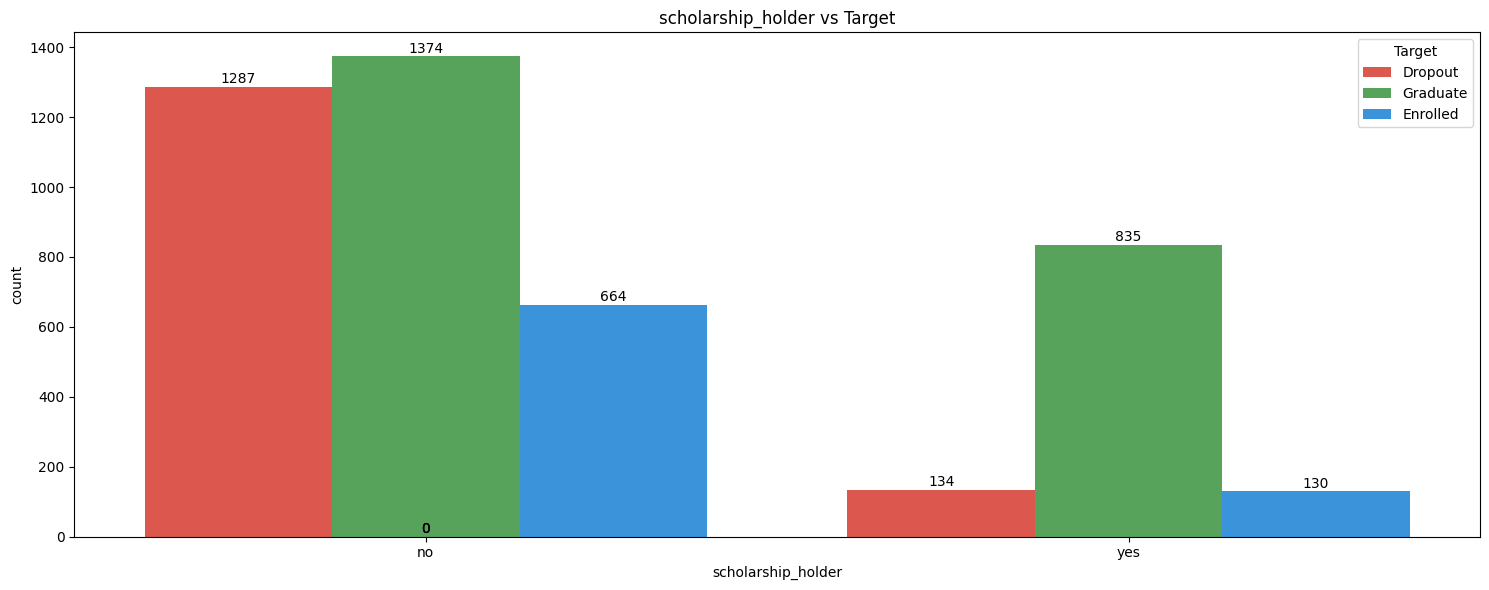

In [41]:
status_colors = {
    'Graduate': '#4CAF50',
    'Enrolled': '#2196F3',
    'Dropout': '#F44336'
}

# Visualisasi Target vs Marital_status
plt.figure(figsize=(15,6))
ax = sns.countplot(x='scholarship_holder', hue='target', data=df_replaced, palette=status_colors)
plt.title('scholarship_holder vs Target')
plt.xticks(rotation=0)
plt.legend(title='Target')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=10
    )
plt.tight_layout()
plt.show()

Visualisasi diatas menunjukkan distribusi status akademik siswa (Target) berdasarkan kepemilikan beasiswa (scholarship_holder). Terlihat bahwa sebagian besar mahasiswa yang tidak menerima beasiswa cenderung dropout atau lulus, sementara yang menerima beasiswa lebih banyak yang lulus dan jumlah dropout-nya jauh lebih sedikit. Ini mengindikasikan bahwa pemberian beasiswa mungkin berkontribusi positif terhadap kelulusan mahasiswa dan menurunkan angka dropout.

##### Hubungan Course dengan Target

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\3985910814.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='course', data=df_replaced, palette=colors)


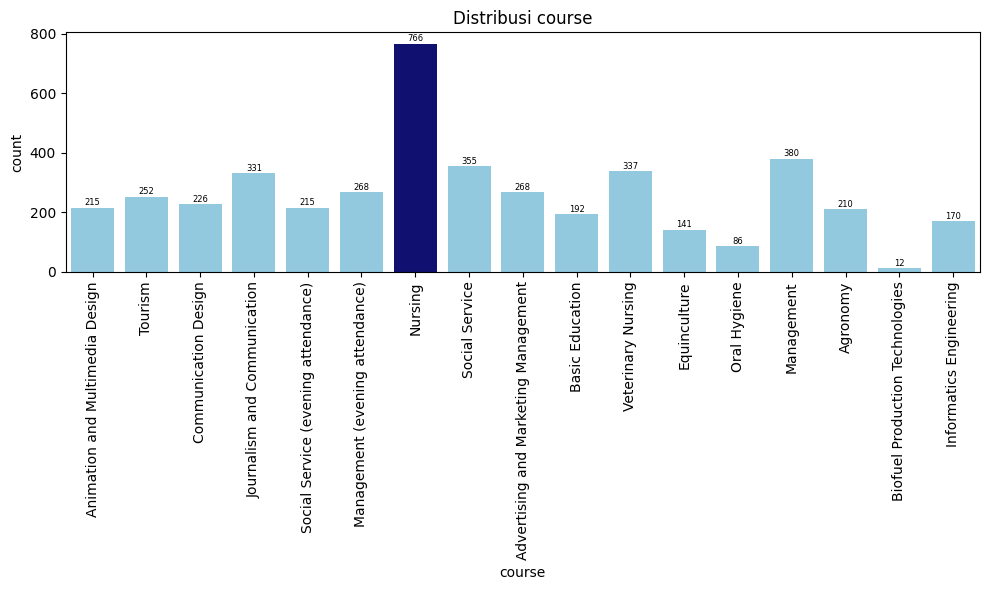

In [42]:
#color pallate
categories = df_replaced['course'].dropna().unique().tolist()
counts = df['course'].value_counts()
max_count = counts.max()
max_categories = counts[counts == max_count].index.tolist()
colors = ['navy' if cat in max_categories else 'skyblue' for cat in categories]

# Buat countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='course', data=df_replaced, palette=colors)

# Tambahkan judul dan label sumbu x
plt.title('Distribusi course')
plt.xticks(
    ticks=[i for i in range(len(df_replaced['course'].unique()))], rotation=90
)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=6
    )

plt.tight_layout()
plt.show()

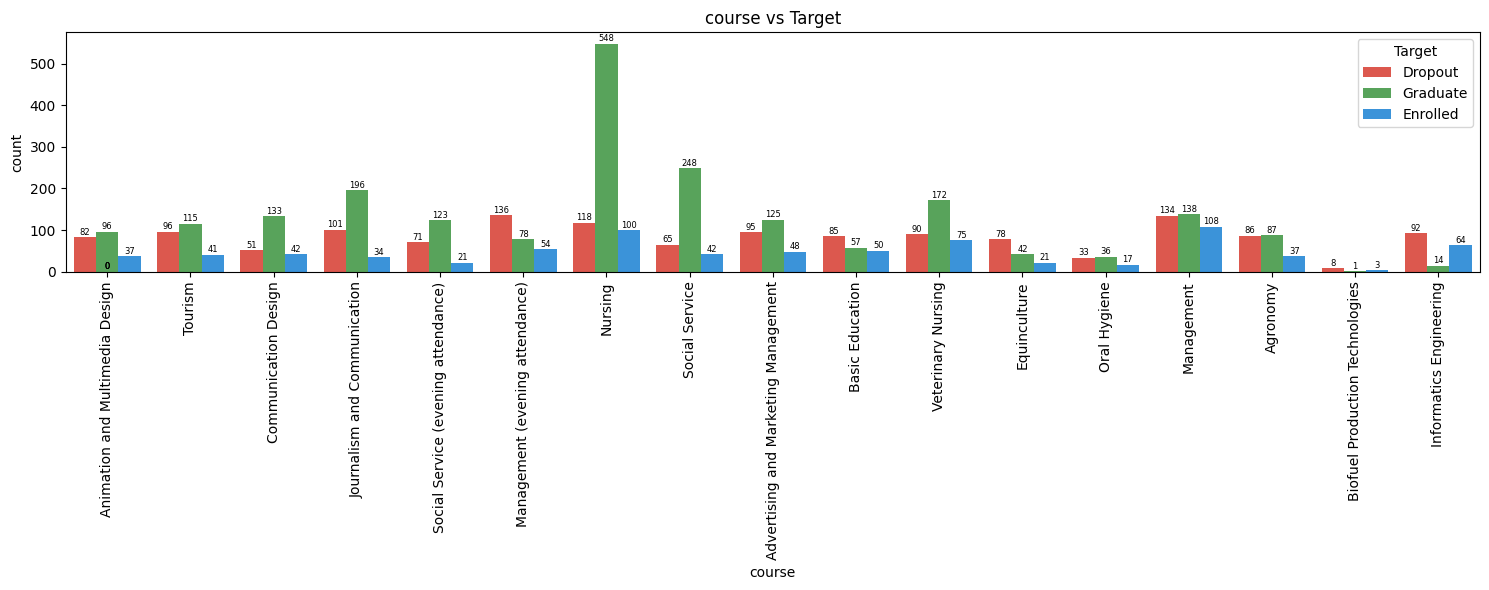

In [43]:
status_colors = {
    'Graduate': '#4CAF50',
    'Enrolled': '#2196F3',
    'Dropout': '#F44336'
}

# Visualisasi Target vs Marital_status
plt.figure(figsize=(15,6))
ax = sns.countplot(x='course', hue='target', data=df_replaced, palette=status_colors)
plt.title('course vs Target')
plt.xticks(rotation=90)
plt.legend(title='Target')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=6
    )
plt.tight_layout()
plt.show()

Visualisasi diatas menunjukkan distribusi status akademik (Target) berdasarkan program studi (course). Program studi Nursing memiliki jumlah lulusan terbanyak secara signifikan, menunjukkan tingkat kelulusan yang tinggi di jurusan ini. Sebaliknya, beberapa jurusan seperti Biofuel Production Technologies dan Informatics Engineering memiliki jumlah mahasiswa yang sangat sedikit, dengan distribusi status yang tidak merata atau condong ke dropout dan enrolled.

##### Hubungan Debtor dengan Target

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\1806953295.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='debtor', data=df_replaced, palette=colors)


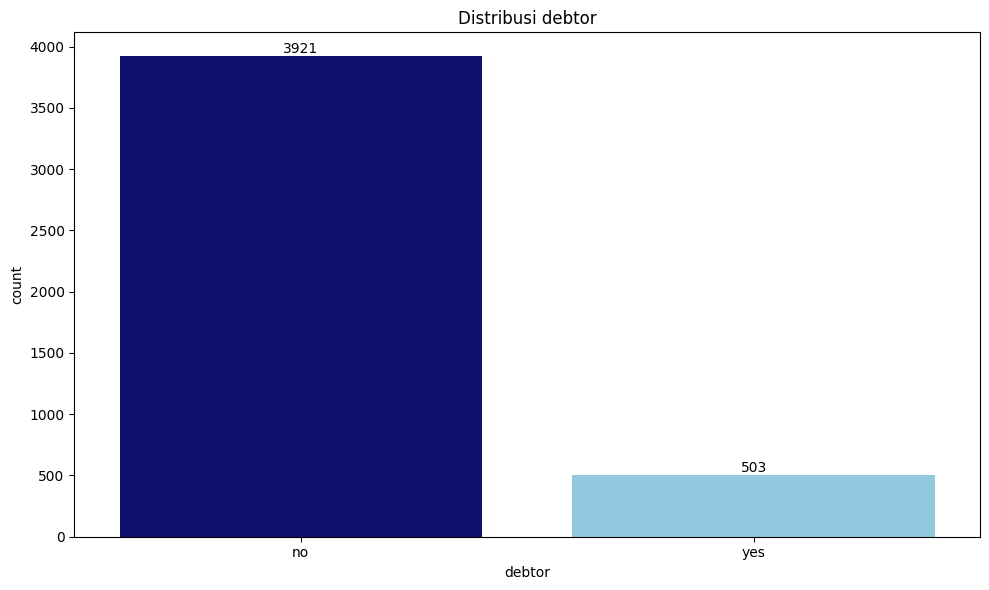

In [44]:
#color pallate
categories = df_replaced['debtor'].dropna().unique().tolist()
counts = df['debtor'].value_counts()
max_count = counts.max()
max_categories = counts[counts == max_count].index.tolist()
colors = ['navy' if cat in max_categories else 'skyblue' for cat in categories]

# Buat countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='debtor', data=df_replaced, palette=colors)

# Tambahkan judul dan label sumbu x
plt.title('Distribusi debtor')
plt.xticks(
    ticks=[i for i in range(len(df_replaced['debtor'].unique()))]
)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

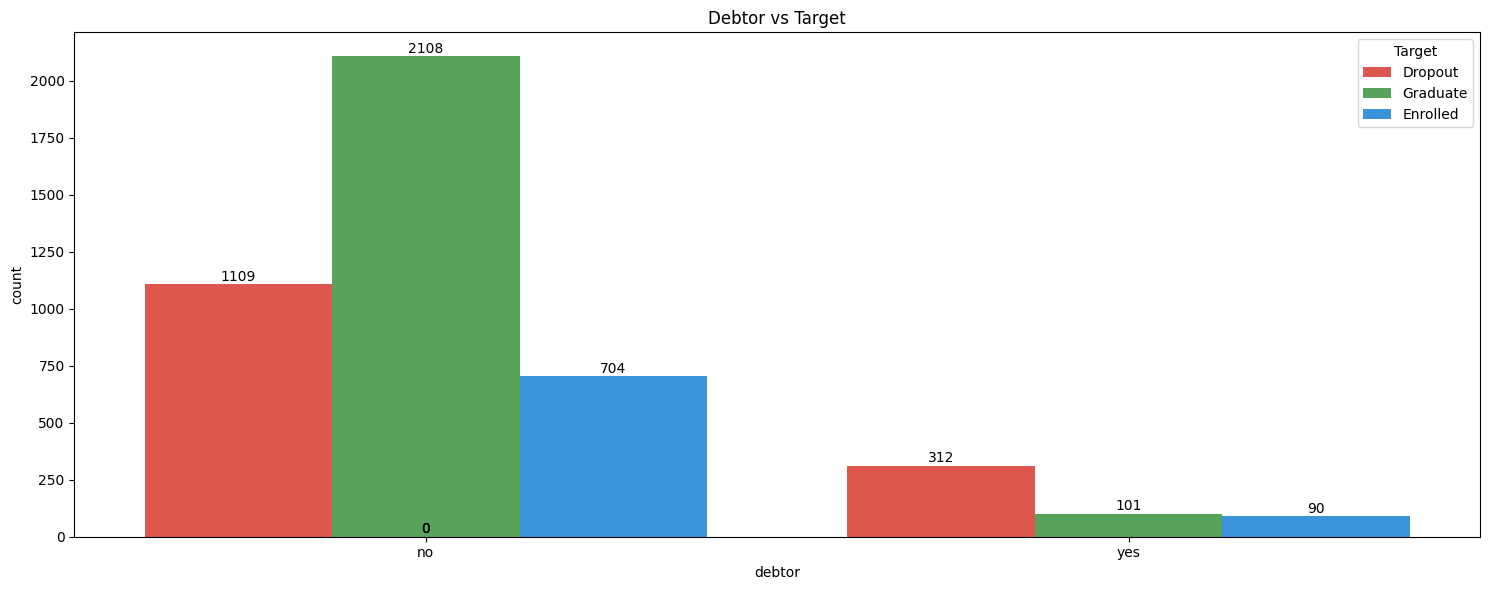

In [45]:
status_colors = {
    'Graduate': '#4CAF50',
    'Enrolled': '#2196F3',
    'Dropout': '#F44336'
}

# Visualisasi Target vs Marital_status
plt.figure(figsize=(15,6))
ax = sns.countplot(x='debtor', hue='target', data=df_replaced, palette=status_colors)
plt.title('Debtor vs Target')
plt.xticks(rotation=0)
plt.legend(title='Target')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,                      
        f'{int(height)}',               
        ha='center', va='bottom', fontsize=10
    )
plt.tight_layout()
plt.show()

Visualisasi diatas menunjukkan hubungan antara status sebagai debitur (debtor) dengan status akademik mahasiswa (Target). Mayoritas mahasiswa yang bukan debitur memiliki angka kelulusan yang sangat tinggi (2108), sedangkan mahasiswa yang merupakan debitur cenderung memiliki angka dropout yang lebih tinggi (312) dibandingkan yang lulus (101). Hal ini mengindikasikan bahwa memiliki utang mungkin berdampak negatif terhadap keberhasilan studi mahasiswa.

##### Distribusi Kolom Age at enrollment dengan kolom Target

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\386896959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age_at_enrollment', data=df_replaced, palette='Set1')


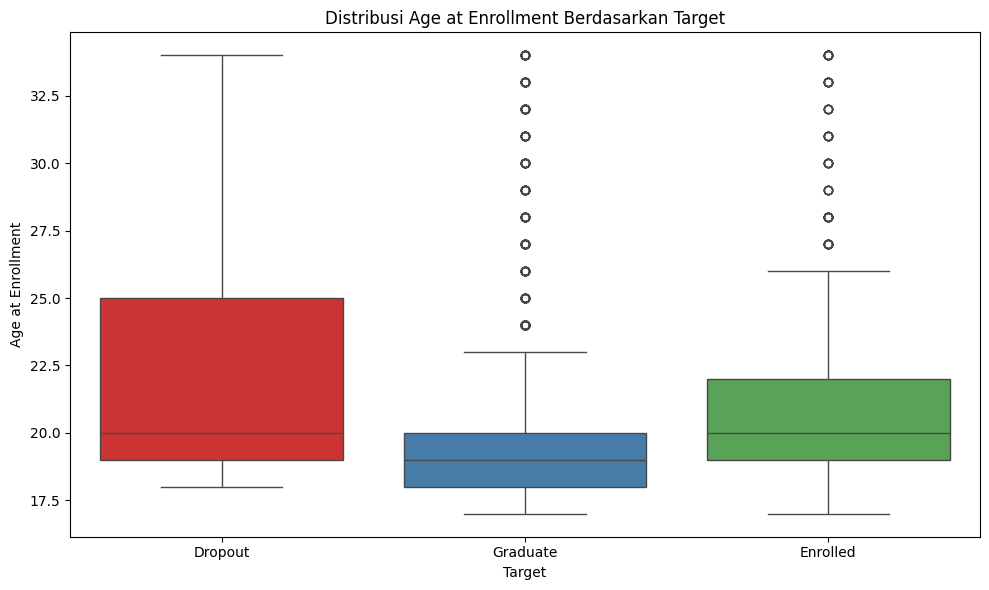

In [46]:
# Boxplot untuk age_at_enrollment berdasarkan target
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='age_at_enrollment', data=df_replaced, palette='Set1')
plt.title('Distribusi Age at Enrollment Berdasarkan Target')
plt.xlabel('Target')
plt.ylabel('Age at Enrollment')
plt.tight_layout()
plt.show()

Boxplot menunjukkan bahwa mahasiswa yang dropout memiliki usia pendaftaran yang lebih bervariasi dan cenderung lebih tua dibandingkan dengan yang lulus atau masih terdaftar. Mahasiswa yang lulus umumnya mendaftar di usia lebih muda dengan distribusi usia yang lebih sempit, menunjukkan konsistensi. Hal ini mengindikasikan bahwa semakin muda usia saat pendaftaran, semakin besar peluang mahasiswa untuk menyelesaikan studi.

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\1393390917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='inflation_rate', data=df_replaced, palette='Set1')


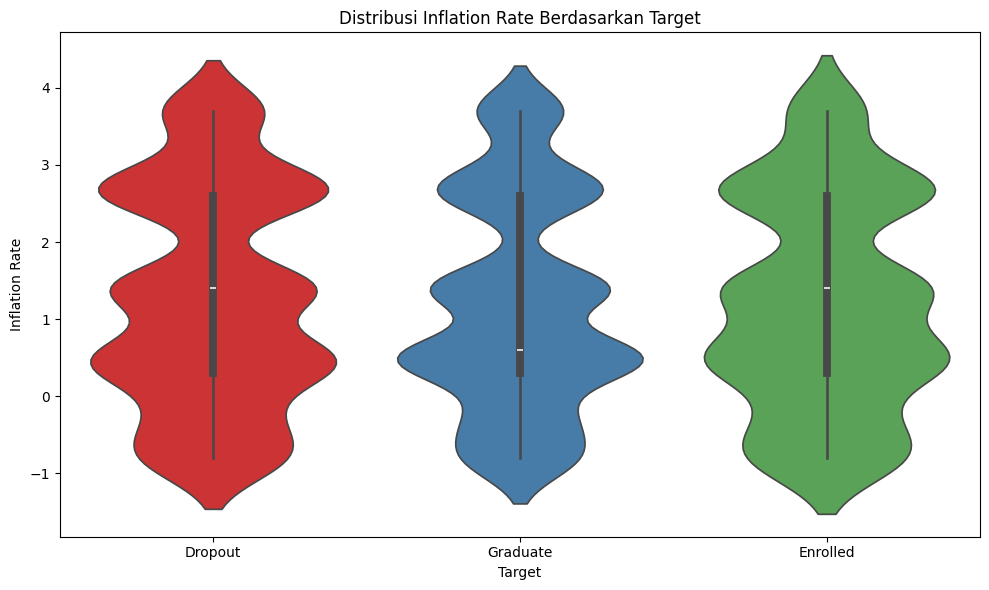

In [47]:
plt.figure(figsize=(10,6))
sns.violinplot(x='target', y='inflation_rate', data=df_replaced, palette='Set1')
plt.title('Distribusi Inflation Rate Berdasarkan Target')
plt.xlabel('Target')
plt.ylabel('Inflation Rate')
plt.tight_layout()
plt.show()

Gambar violin plot menunjukkan distribusi nilai inflation rate pada masing-masing kategori target. Ketiga kelompok—Dropout, Graduate, dan Enrolled—memiliki rentang dan sebaran inflasi yang relatif mirip, meskipun kelompok Graduate cenderung memiliki median inflasi yang sedikit lebih rendah. Hal ini menunjukkan bahwa tingkat inflasi tidak memiliki perbedaan mencolok terhadap status kelulusan mahasiswa.

#### Menyimpan dataset untuk membuat dashboard

In [48]:
df_replaced.to_csv("dataset_untuk_dashboard.csv",index=False)

## Data Preparation / Preprocessing

In [49]:
df_model = df_replaced.copy()

### Cleaning data (cek missing value, duplikat data, etc)

In [50]:
df_model.isnull().sum()

marital_status                                  0
application_mode                                0
application_order                               0
course                                          0
daytimeevening_attendance                       0
previous_qualification                          0
previous_qualification_grade                    0
nacionality                                     0
mothers_qualification                           0
fathers_qualification                           0
mothers_occupation                              0
fathers_occupation                              0
admission_grade                                 0
displaced                                       0
educational_special_needs                       0
debtor                                          0
tuition_fees_up_to_date                         0
gender                                          0
scholarship_holder                              0
age_at_enrollment                               0


Karena tidak terdapat missing value, maka ke tahap berikutnya.

In [51]:
df_model.duplicated().sum()

0

Disini tidak terdapat duplicate data juga, jadi lanjut ke tahap berikutnya.

In [52]:
# Menyeragamkan data kategorikal: semua ke huruf kecil dan hapus spasi ekstra
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = df_model[col].str.strip().str.lower()

kode diatas bertujuan untuk menyeragamkan penulisan data kategorikal(string) ke penulisan huruf kecil semua(lower), serta jika terdapat ekstra spasi akan dihapus.

In [53]:
x = df_model.drop(["target","educational_special_needs","international"], axis=1)
y = df_model["target"].map({
    "graduate":0,
    "enrolled":1,
    "dropout":2
})

In [54]:
categorical_cols = [col for col in categorical_cols if col in x.columns]
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

### Split dataset untuk train dan testing

In [55]:
# split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [56]:
data_summary = {
    "Features Berjumlah": len(list(x)),
    "X_train Shape": X_train.shape,
    "X_test Shape": X_test.shape,
    "y_train Distribution": y_train.value_counts(),
    "y_test Distribution": y_test.value_counts()
}

for key, value in data_summary.items():
    print(f"{key} : {value}\n")

Features Berjumlah : 236

X_train Shape : (3539, 236)

X_test Shape : (885, 236)

y_train Distribution : 0    1767
2    1137
1     635
Name: target, dtype: int64

y_test Distribution : 0    442
2    284
1    159
Name: target, dtype: int64



## Modeling

In [57]:
!nvidia-smi

Tue May 13 12:21:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.02                 Driver Version: 576.02         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0             10W /   70W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [58]:
hasil_eval = {"nama_model":[],
             "accuracy":[],
             "f1_score":[],
             "precission_score":[],
             "recal_score":[]}

### Model RandomForest

In [59]:
RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = 'balanced')
RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [60]:
# Membuat prediksi pada X_test
pred = RF.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  
f1 = f1_score(y_test, pred, average='macro')  
rec = recall_score(y_test, pred, average='macro')  
prec = precision_score(y_test, pred, average='macro')  
cm_RF = confusion_matrix(y_test, pred)

hasil_eval["nama_model"].append("Random Forest")
hasil_eval["accuracy"].append(acc)
hasil_eval["f1_score"].append(f1)
hasil_eval["precission_score"].append(prec)
hasil_eval["recal_score"].append(rec)

### Model LogisticRegression

In [61]:
LR = LogisticRegression(penalty='l2',random_state=24)
LR.fit(X_train, y_train)

C:\Users\zaina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=24)

In [62]:
pred = LR.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  
f1 = f1_score(y_test, pred, average='macro')  
rec = recall_score(y_test, pred, average='macro')  
prec = precision_score(y_test, pred, average='macro')  
cm_RF = confusion_matrix(y_test, pred)

hasil_eval["nama_model"].append("LogisticRegression")
hasil_eval["accuracy"].append(acc)
hasil_eval["f1_score"].append(f1)
hasil_eval["precission_score"].append(prec)
hasil_eval["recal_score"].append(rec)

### Model SVM (Support Vector Machine)

In [63]:
SVM = SVC(random_state=42, class_weight="balanced")
SVM.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [64]:
pred = SVM.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  
f1 = f1_score(y_test, pred, average='macro')  
rec = recall_score(y_test, pred, average='macro')  
prec = precision_score(y_test, pred, average='macro')  
cm_RF = confusion_matrix(y_test, pred)

hasil_eval["nama_model"].append("SVM")
hasil_eval["accuracy"].append(acc)
hasil_eval["f1_score"].append(f1)
hasil_eval["precission_score"].append(prec)
hasil_eval["recal_score"].append(rec)

### Model XGBoost

In [65]:
XGB = XGBClassifier(random_state=42)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [66]:
pred = XGB.predict(X_test)

# Menghitung metrik evaluasi
acc = accuracy_score(y_test, pred)  
f1 = f1_score(y_test, pred, average='macro')  
rec = recall_score(y_test, pred, average='macro')  
prec = precision_score(y_test, pred, average='macro')  
cm_RF = confusion_matrix(y_test, pred)

hasil_eval["nama_model"].append("XGBosst")
hasil_eval["accuracy"].append(acc)
hasil_eval["f1_score"].append(f1)
hasil_eval["precission_score"].append(prec)
hasil_eval["recal_score"].append(rec)

## Evaluation

In [67]:
df_hasil_eval = pd.DataFrame(hasil_eval)
df_hasil_eval

,nama_model,accuracy,f1_score,precission_score,recal_score
0,Random Forest,0.760452,0.672619,0.720055,0.661757
1,LogisticRegression,0.733333,0.617818,0.655625,0.623692
2,SVM,0.625989,0.595680,0.631651,0.604978
3,XGBosst,0.779661,0.720896,0.737711,0.710736


pada tabel hasil evaluasi dari 4 model, model yang paling bagus adalah XGBoost jadi saya akan memilih model tersebut dan menyimpannya.

In [68]:
# Simpan model
joblib.dump(XGB, 'model/model.pkl')

['model/model.pkl']

### TOP 15 Featur Si Paling Penting

C:\Users\zaina\AppData\Local\Temp\ipykernel_8524\2129733250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="crest")


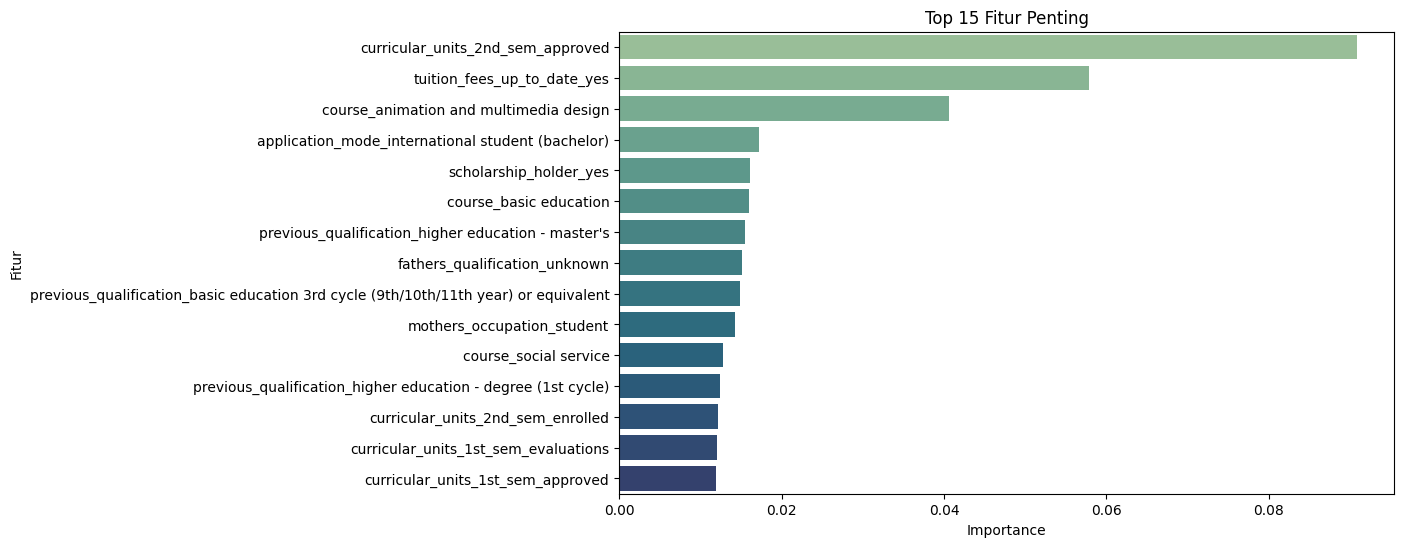

In [69]:
importances = XGB.feature_importances_
feat_names = x.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="crest")
plt.title("Top 15 Fitur Penting")
plt.ylabel("Fitur")
plt.xlabel("Importance")
plt.show()